# Problem

This project aims to optimize marketing strategies and boost electronic product sales by leveraging customer segmentation. Using transactional records from an electronic company available on [Kaggle](https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024), we will analyze customer demographics, product types, and purchase behaviors over a one-year period. Through feature engineering and K-means clustering, we will segment customers into distinct groups, enabling a deeper understanding of their profiles and preferences. Building upon this segmentation, we will develop a recommendation system that suggests top-selling products to customers within each segment who haven't purchased those items yet. By tailoring marketing efforts to specific customer segments, we anticipate significant improvements in sales performance.

# Objectives

- **Data Cleaning & Transformation**: Clean the data by handling data structures issues, duplicates, missing data, and outliers to ensure effective clustering.

- **Data visualization**: Create visual representations of the data to identify patterns, trends, and relationships, aiding in understanding and interpretation.
    
- **Feature Engineering**: Creates new features from existing data to improve model performance and extract valuable insights.

- **Data Preprocessing**: Apply feature scaling and dimensionality reduction to make the clustering process more efficient.

- **Customer Segmentation using K-Means Clustering**: Divide customers into different groups using K-means clustering, allowing for targeted marketing and personalized approaches.
    
- **Cluster Analysis & Evaluation**:  Examine and describe each cluster to create specific marketing plans and assess the quality of the created clusters.

- **Recommendation System**: Develop a system to suggest popular products to customers in the same group who haven't bought them, with the goal of increasing sales and improving marketing effectiveness.

# 1. Import Packages

In [1583]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Kmeans
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
from sklearn.ensemble import IsolationForest


%matplotlib inline

## 1.1 Set Theme

Set color theme for visualizations

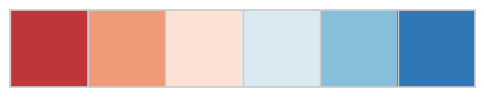

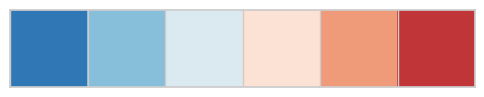

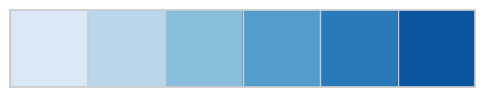

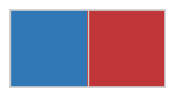

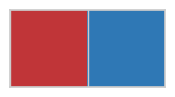

In [1584]:
# Set seaborn styles
palette = sns.color_palette("RdBu")
palette_r = sns.color_palette("RdBu_r")
seq_palette =  sns.color_palette("Blues", 6)
sns.set_theme(style='whitegrid', palette=palette_r)
sns.palplot(palette)
sns.palplot(palette_r)
sns.palplot(seq_palette)

# Create 2 color palette
BR = [(0.1843137254901961, 0.47266435986159167, 0.7116493656286044),(0.7561707035755478, 0.21038062283737025, 0.22352941176470587)]
palette2 = sns.blend_palette(BR,2)
sns.palplot(palette2)

# Create 2 color palette
RB = [(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),(0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]
palette2_r = sns.blend_palette(RB,2)
sns.palplot(palette2_r)

# create  colors for visuals
colors6 = ['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']
colors2 = ['#c13639', '#2f79b5']

# 2. Load Dataset

In [1585]:
df=pd.read_csv('data/Electronic_sales_Sep2023-Sep2024.csv')            

## 2.1 Dataset Overview

In [1586]:
df.head()

Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accessory,Accessory         40.21  
1    2024-04-20     Overnight                   Impulse Item         26.09  
2    2023-10-17       Express                            NaN          0.00  
3    2024-08-09     Overnight      Impulse Item,Impulse Item         60.16  
4    2024-05-21       Express                      Accessory         35.56

In [1587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             20000 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

This dataset contains sales transaction records for an electronics company over a one-year period, spanning from September 2023 to September 2024. It includes detailed information about customer demographics, product types, and purchase behaviors.


The dataset consists of 20000 rows and 16 columns. Here`s a brief overview of each column:
- `Customer ID`: Unique identifier for each customer.

**Demographic Features**

- `Age`: Age of the customer (numeric)

- `Gender`: Gender of the customer (Male or Female)


**Product Features**
- `Product Type`: Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)

- `SKU`: a unique code for each product.

- `Unit Price`: Price per unit of the product (numeric)

**Behavioral Features**
- `Loyalty Member`: (Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)

- `Rating`: Customer rating of the product (1-5 stars) (Should have no Null Ratings)

- `Order` Status: Status of the order (Completed, Cancelled)

- `Payment Method`: Method used for payment (e.g., Cash, Credit Card, Paypal)

- `Total Price`: Total price of the transaction (numeric)

- `Quantity`: Number of units purchased (numeric)

- `Purchase Date`: Date of the purchase (format: YYYY-MM-DD)

- `Shipping Type`: Type of shipping chosen (e.g., Standard, Overnight, Express)

- `Add-ons Purchased`: List of any additional items purchased (e.g., Accessories, Extended Warranty)

- `Add-on Total`: Total price of add-ons purchased (numeric)

----


### Observations

- There are missing values in `Add-ons Purchased`.


### Actions
- change `Purchase Date` datatype to datetime
- standardize feature names by replacing space with underscore(_) and change to lowercase text  format


## 2.2 Summary Statistics

### Numerical features

In [1588]:
# Summary statistics for numerical variables
df.describe()

Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75%        8.000000     93.842500  
max       10.000000    292.770000

#### Observations

`Age`: The customers' age range from 18 to 80 with average of 48.99. The mean and median are close suggesting an evenly spread distribution. 

`Rating`: Product rating averages around 3.09 with a min of 1 and max of 5. The mean and median are almost the same suggesting an evenly spread distribution. 

`Total Price`: Prices vary widely, from $20.75 to $11,396.80. The mean is greater than the median indicating a highly skewed distribution, with a long tail to the right. This suggests that a small number of customers make very large purchases.

`Unit Price`: Prices range from $20.75 to $1,139.68. The distribution is also skewed to the right, suggesting that some products are significantly more expensive than others.

`Quantity`: Quantities range from 1 to 10 units. The distribution is skewed to the left, indicating that most customers purchase a small number of units.

`Add-on_Total`: Add-on totals range from $0 to $292.77. The distribution is highly skewed to the right, with a long tail to the right, indicating that a small number of customers purchase a large number of add-ons.

---
**Questions:**
- Which age bracket spends the most and which spends the least?



### Categorical Features

In [1589]:
# Summary statistics for categorical variables
df.describe(include='object').T

count unique                top   freq
Gender             20000      2               Male  10165
Loyalty Member     20000      2                 No  15657
Product Type       20000      5         Smartphone   5978
SKU                20000     10             TBL345   2062
Order Status       20000      2          Completed  13432
Payment Method     20000      6        Credit Card   5868
Purchase Date      20000    366         2024-04-26     88
Shipping Type      20000      5           Standard   6725
Add-ons Purchased  15132     75  Extended Warranty   1701

Check unique values for categorical features

In [1590]:
def print_unique_values(df):
    """Prints unique values for each categorical variable in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the categorical variables.
    """

    for col in df.select_dtypes(include=['object']).columns:
        unique_values = df[col].unique()
        print(f"\n{col}:")
        print(unique_values)

print_unique_values(df)


Gender:
['Male' 'Female']

Loyalty Member:
['No' 'Yes']

Product Type:
['Smartphone' 'Tablet' 'Laptop' 'Smartwatch' 'Headphones']

SKU:
['SKU1004' 'SKU1002' 'SKU1005' 'SKU1001' 'SKU1003' 'LTP123' 'SMP234'
 'TBL345' 'HDP456' 'SWT567']

Order Status:
['Cancelled' 'Completed']

Payment Method:
['Credit Card' 'Paypal' 'Cash' 'Debit Card' 'Bank Transfer' 'PayPal']

Purchase Date:
['2024-03-20' '2024-04-20' '2023-10-17' '2024-08-09' '2024-05-21'
 '2024-05-26' '2024-01-30' '2024-06-24' '2023-10-03' '2024-01-01'
 '2024-06-25' '2023-11-07' '2023-09-25' '2024-07-07' '2024-03-18'
 '2024-01-02' '2024-05-18' '2024-09-02' '2024-07-23' '2024-03-14'
 '2024-07-21' '2023-12-02' '2024-04-27' '2024-07-10' '2024-01-29'
 '2024-08-28' '2023-11-28' '2023-11-30' '2024-02-27' '2024-01-21'
 '2024-09-03' '2024-01-12' '2023-09-24' '2024-03-25' '2023-10-12'
 '2024-01-28' '2024-07-08' '2024-07-29' '2024-08-17' '2024-09-23'
 '2024-08-31' '2023-10-16' '2024-06-26' '2024-07-16' '2024-03-05'
 '2023-12-11' '2023-10-28' 

`Gender`: 2 unique values, with a slight imbalance, with 165 more male customers than female.

`Loyalty Member`: 2 unique values (Yes/No) where a majority of customers are non members.

`Product Type`: There's a total of 5 electronic product types with smartphones being sold the most.

`SKU`: Total of 10 skus with TBL345 as the most purchased

`Order Status`: 13432 are completed transactions, which indicates the rest are cancelled transactions. This is 32.8% of transactions are cancelled!

`Payment Method`: There are 6 options for payment methods and credit card is used most often. However, Paypal is duplicated which results in 5 actual payment methods. 

`Shipping Type`: 5 different shipping services offered. Standard shipping is the most popular option, followed by express shipping.

`Add-ons Purchased`: 75 different add-ons? Extended Warranty is most selected. This column is most likely combination of various add-ons listed in this column.

---

**Actions:**
- Fix duplicated paypal for payment methods
- Investigate reasons for cancelled orders 

# 3. Data Cleaning

This step involves a thorough cleaning and restructuring of the data to improve its quality. It includes fixing errors, dealing with missing information, removing duplicate entries, identifying outliers, and making other necessary changes to prepare the data for analysis and modeling.

## 3.1 Fix Data Structures

1. Standardize column names 
2. Convert `Purchase_Date` to datetime
3. Remove duplicated entries of Paypal in `payment_method`

### 3.1.1 Standardize column names

- Replacing space in column names with with underscore (_)
- Convert column names to lower case

In [1591]:
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_").str.lower()
df.head(1)

customer_id  age gender loyalty_member product_type      sku  rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   

  order_status payment_method  total_price  unit_price  quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   

  purchase_date shipping_type              add_ons_purchased  add_on_total  
0    2024-03-20      Standard  Accessory,Accessory,Accessory         40.21

### 3.1.2 Convert `purchase_date` to datetime format

In [1592]:
# Convert `Purchase_Date` to datetime format
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
# Validate changes 
df.dtypes

customer_id                   int64
age                           int64
gender                       object
loyalty_member               object
product_type                 object
sku                          object
rating                        int64
order_status                 object
payment_method               object
total_price                 float64
unit_price                  float64
quantity                      int64
purchase_date        datetime64[ns]
shipping_type                object
add_ons_purchased            object
add_on_total                float64
dtype: object

### 3.1.3 Remove duplicated entries of Paypal in `payment_method`

In [1593]:
df['payment_method'] = df['payment_method'].replace('PayPal', 'Paypal')
df['payment_method'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer'],
      dtype=object)

## 3.2 Handle Duplicates

In [1594]:
print('No. of Duplicates:', df.duplicated().sum())

No. of Duplicates: 0


There are no duplicates in this dataset

## 3.3 Handle Missing Values

Here we will check the percentage of nan values present in each feature


In [1595]:
# Make the list of features which has missing values
na_features=[features for features in df.columns if df[features].isnull().sum()>1]

# Print the feature name and the percentage of missing values
for feature in na_features:
    print(
        f"{feature:<15}{np.round(df[feature].isnull().mean(), 4):^10}{'% missing values':>20}")

add_ons_purchased  0.2434      % missing values


Because the main goal of this project is to suggest personalized products, we will remove any information about add-ons from the dataset. This will help us focus on the core products and improve the accuracy of our recommendations.

In [1596]:
# Drop columns with add-on data
df = df.drop(columns=['add_ons_purchased','add_on_total'],axis=1)

Validate Missing Values

In [1597]:
df.isnull().sum().sum()

0

There is no longer missing values after removing the `add_ons_purchased` column

## 3.4 Outlier Detection

In [1598]:
# Separate numerical columns 
num_cols = df.select_dtypes(include=['int32','int64','float64']).columns.tolist()
num_cols = num_cols[1:] #exclude customer_id column

print('Outliers Detected')

# Print total rows of outliers
unique_outlier_rows = set()
total_outliers = 0

# Loop to cycle through numerical columns and calculate IQR for each 
for col in num_cols:
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    upper_limit = round(Q3 + 1.5 * IQR, 2)
    lower_limit = round(Q1 - 1.5 * IQR, 2)

    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    
    if len(outliers) > 0:
        print(len(outliers),'rows in',f'{col:<20}',f'lower: {lower_limit:<10}', "/   ", f'upper: {upper_limit}')
        unique_outlier_rows.update(outliers.index)
        total_outliers += len(outliers)

        percent_outliers = (len(outliers)/len(df)*100)

print(percent_outliers,'% in dataset')

Outliers Detected
383 rows in total_price          lower: -4110.2    /    upper: 9889.48
1.915 % in dataset


### Observations

`total_price`: Has 383 rows of outliers which is only 1.91% of entire dataset. All rows are most likely purchases over $9889.48 as there are no negative values in the column

### Actions
1. **Visualize Outliers**: Create a histogram showing the distribution of total_price and mark the outliers.

2. **Isolate Outliers**: Identify the data points that are considered outliers and create a separate dataset containing only these points.

3. **Analyze Outlier Relationships**: Compare the outliers to other features in the data to understand why they might be unusual and discover any patterns or connections.

4. **Outlier Strategy**: Determine appropriate stratrgy to handle outliers

#### 3.4.1 Visualize Outliers

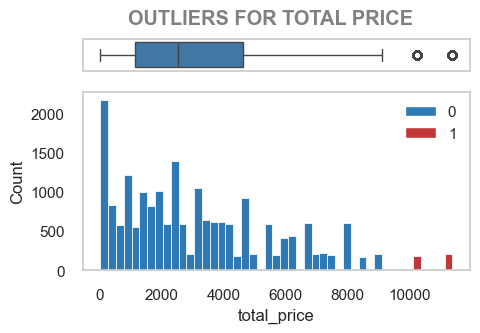

In [1599]:
# Create the figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 1, figsize=(5, 3), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

plt.suptitle('OUTLIERS FOR TOTAL PRICE', fontweight='bold', color='grey')

sns.boxplot(data=df, x='total_price', orient="h", ax=axs[0])
axs[0].set(xlabel='')  # Remove x-axis label for boxplot
axs[0].grid(False)  # Remove grid

# variable to filter outliers in the data
outliers = np.where((df['total_price'] > 9889.48),1, 0)

sns.histplot(data=df, x='total_price', ax=axs[1], hue=outliers, palette=palette2, alpha=1)
axs[1].grid(False)  # Remove grid

This confirms our assumption that all outliers are for `total_price` over 9889.49. 

#### 3.4.2 Isolate Outliers

In [1600]:
# Create a mask for outliers
outlier_mask = df['total_price'] > 9889.48

# Filter the DataFrame using the mask
df_outliers = df[outlier_mask]
df_outliers.head()

customer_id  age  gender loyalty_member product_type     sku  rating  \
10016        11022   26    Male            Yes   Smartphone  SMP234       1   
10021        11029   40  Female             No   Smartphone  SMP234       5   
10048        11046   47    Male             No   Smartphone  SMP234       4   
10062        11063   78    Male             No   Smartphone  SMP234       1   
10134        11118   50  Female             No   Smartphone  SMP234       3   

      order_status payment_method  total_price  unit_price  quantity  \
10016    Cancelled         Paypal     11396.80     1139.68        10   
10021    Completed  Bank Transfer     10257.12     1139.68         9   
10048    Completed  Bank Transfer     11396.80     1139.68        10   
10062    Completed         Paypal     10257.12     1139.68         9   
10134    Completed         Paypal     10257.12     1139.68         9   

      purchase_date shipping_type  
10016    2024-05-08     Expedited  
10021    2024-05-16     Expedited  
10048    2024-03-31      Same Day  
10062    2024-01-10      Standard  
10134    2024-06-21     Expedited

#### 3.4.3 Visualize Outlier Relationships

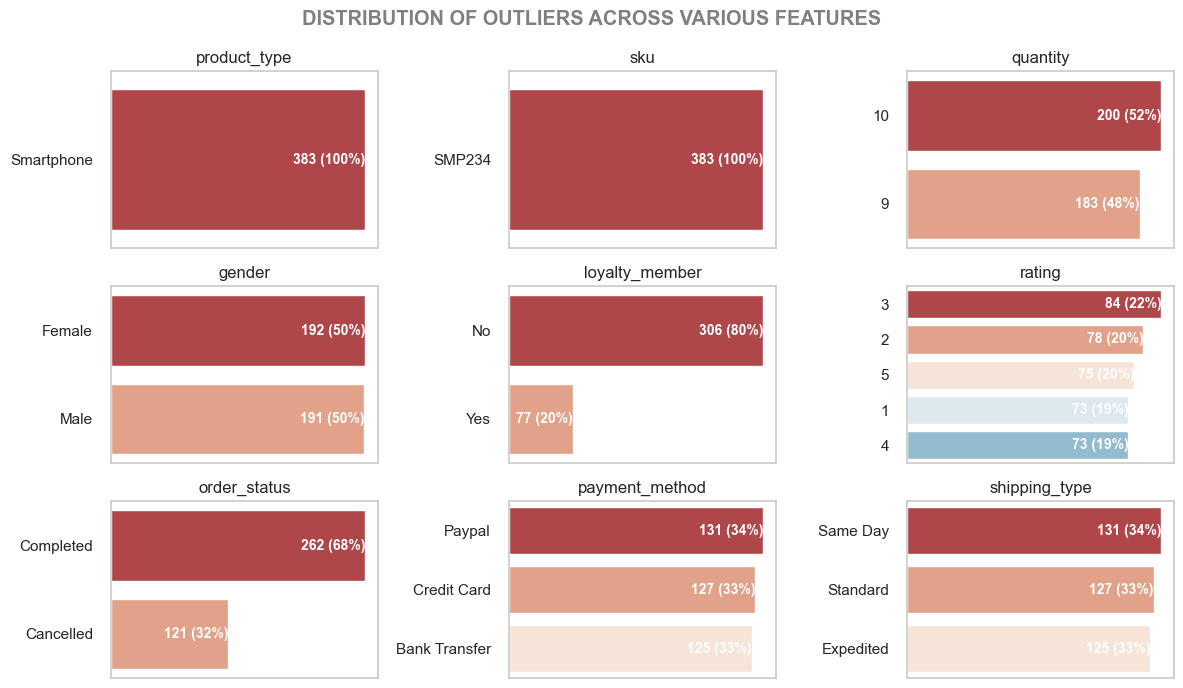

In [1601]:
# Define columns and number of columns per row
columns = ['product_type', 'sku', 'quantity',
           'gender', 'loyalty_member', 'rating',
           'order_status', 'payment_method', 'shipping_type']
columns_per_row = 3

# Calculate number of rows for subplots
num_rows = (len(columns) // columns_per_row) + (len(columns) % columns_per_row > 0)

# Create figure and subplots with suptitle
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(12, 7))
plt.suptitle('DISTRIBUTION OF OUTLIERS ACROSS VARIOUS FEATURES', fontweight='bold', color='grey')

# Loop through columns and create countplots
for i, col in enumerate(columns):
    row = i // columns_per_row
    col_index = i % columns_per_row
    ax = axes[row, col_index]

    # Countplot with percentages and labels
    sns.countplot(y=df_outliers[col], ax=ax, palette=palette,
                 order=df_outliers[col].value_counts(ascending=False).index)

    # Get the counts 
    counts = df_outliers[col].value_counts(ascending=False).values
    total = df_outliers.shape[0]

    # Calculate percentages
    percentages = ((counts / total) * 100).round(2)

    # Create labels with percentages
    labels = [f"{value} ({percentage:.0f}%)" for value, percentage in zip(counts, percentages)]

    # Label bars with percentages (adjust vertical offset as needed)
    for j, (patch, label) in enumerate(zip(ax.patches, labels)):
        ax.text(patch.get_width() + 0.2, patch.get_y() + patch.get_height() / 2,
                label, ha='right', va='center', fontweight='bold', fontsize=10, color='white')

    #format axis
    ax.set_title(col)
    ax.grid(False)
    ax.set_xlabel('')
    ax.set_ylabel('')  
    ax.set_xticklabels([])
    
# Adjust layout and show plot
plt.tight_layout()
plt.show()

##### Key Observations  

1. All transactions with a total price exceeding $9,889.49 involve the purchase of **smartphones**, specifically those with the SKU number **SMP234**.

2. These transactions involve **large quantities** of 9 or more units.

The large quantity purchases only for SMP234 smartphones indicate bulk buying, perhaps for business purposes or reselling. 

##### Actions
Given that this project is focused on individualizing marketing strategies, we'll exclude the outliers related to bulk purchases. These outliers are not representative of the typical customers we're targeting.

#### 3.4.4 Drop Outliers

In [1602]:
df_cleaned = df.copy()

In [1603]:
# # remove the outliers from the dataset and save as new dataframe
# df_cleaned = df[~outlier_mask]

# # Check the shape of the cleaned dataset
# len(df)-len(df_cleaned)

# 4. Data Visualization

Now that the data has been cleaned, we will proceed to visualize the features based on the following categories.

1. **Demographic**: These features provide information about the personal characteristics of customers
    - `Age`, `Gender`
    
2. **Product**:  These features describe the products purchased by customers, 
    - `Product_Type`, `SKU`, `Unit_Price`

3. **Behavioral**: These features capture the behavior of customers,
    - `Loyalty_Member`, `Rating`, `Order_Status`, `Payment_Method`, `Shipping_Type`

4. **RFM**:These features are derived from customer purchase data and represent three key metrics:
    - Recency (how recently a customer has made a purchase.) = `Purchase_Date`
    - Frequency (how often a customer has made purchases.) = `Quantity`
    - Monetary (total amount of money a customer has spent) =  `Total_Price`

By visualizing these categories, we can gain valuable insights into customer behavior, preferences, and product performance.

## 4.1 Demographic Features 

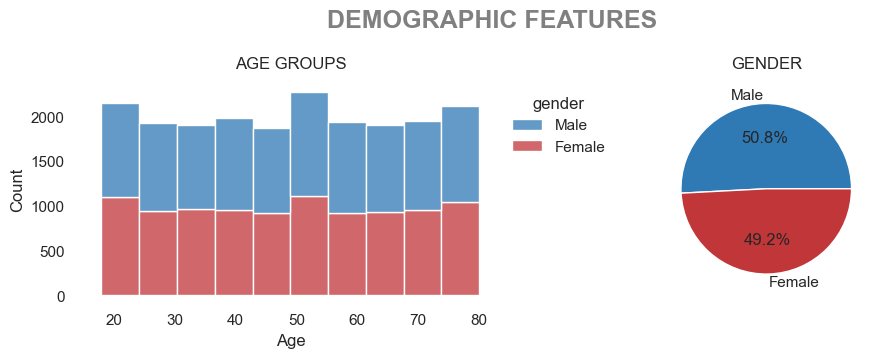

In [1604]:
# Create the figure with 2 rows and 2 columns
plt.figure(figsize=(10, 6))
plt.suptitle('DEMOGRAPHIC FEATURES', fontsize=18, fontweight='bold', color='grey')

# Plot Age Histogram
plt.subplot(2, 2, 1)
ax = sns.histplot(data=df_cleaned, x='age', hue='gender', multiple='stack', bins=10, palette=palette2)
plt.title('AGE GROUPS', pad=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)

# Pie chart of gender
plt.subplot(2, 2, 2)
gender_counts = df_cleaned['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=palette2)
plt.title('GENDER', pad=10)

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

Observations

`Age` : uniformly distributed, with most customers in the 50-60 age group

`Gender`: almost equal distribution, 50.8% male and 49.2% female


## 4.2 Product Features 

### 4.2.1. Group SKU by Project Type

In [1605]:
df_cleaned.groupby(by=['product_type','sku']).size().reset_index()

product_type      sku     0
0    Headphones   HDP456  2010
1    Headphones  SKU1003     1
2        Laptop   LTP123  1961
3        Laptop  SKU1004     1
4        Laptop  SKU1005  2011
5    Smartphone  SKU1001  1972
6    Smartphone  SKU1004  2018
7    Smartphone  SKU1005     1
8    Smartphone   SMP234  1987
9    Smartwatch  SKU1003  1954
10   Smartwatch   SWT567  1980
11       Tablet  SKU1002  2042
12       Tablet   TBL345  2062

**Clean data entry errors**

There are potential data errors for a few SKUs that are assigned to the wrong product type.For example, SKU1003, SKU1004, and SKU1005 each have one entry that doesn't match the typical product type. Therefore, it's safe to assume these are mislabeled and can be corrected.

- SKU1003 --> Smartwatch      
- SKU1004 --> Smartphone    
- SKU1005 --> Laptop            

In [1606]:
# Correct product type labels for specific SKUs
df_cleaned.loc[df['sku'] == 'SKU1003', 'product_type'] = 'Smartwatch'
df_cleaned.loc[df['sku'] == 'SKU1004', 'product_type'] = 'Smartphone'
df_cleaned.loc[df['sku'] == 'SKU1005', 'product_type'] = 'Laptop'

Next, group the DataFrame by product type and SKU, counts the occurrences of each combination, and assigns the result to a new DataFrame named df_product. This step is to validate the changes made to the product type labels and ensure they are correct.

In [1607]:
# Validate changes to product type labels 
df_cleaned.groupby(['product_type', 'sku']).size().reset_index(name='Count')


product_type      sku  Count
0   Headphones   HDP456   2010
1       Laptop   LTP123   1961
2       Laptop  SKU1005   2012
3   Smartphone  SKU1001   1972
4   Smartphone  SKU1004   2019
5   Smartphone   SMP234   1987
6   Smartwatch  SKU1003   1955
7   Smartwatch   SWT567   1980
8       Tablet  SKU1002   2042
9       Tablet   TBL345   2062

### 4.2.2 Plot Average Sales by Product and SKUs

In [1608]:
colors6

['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']

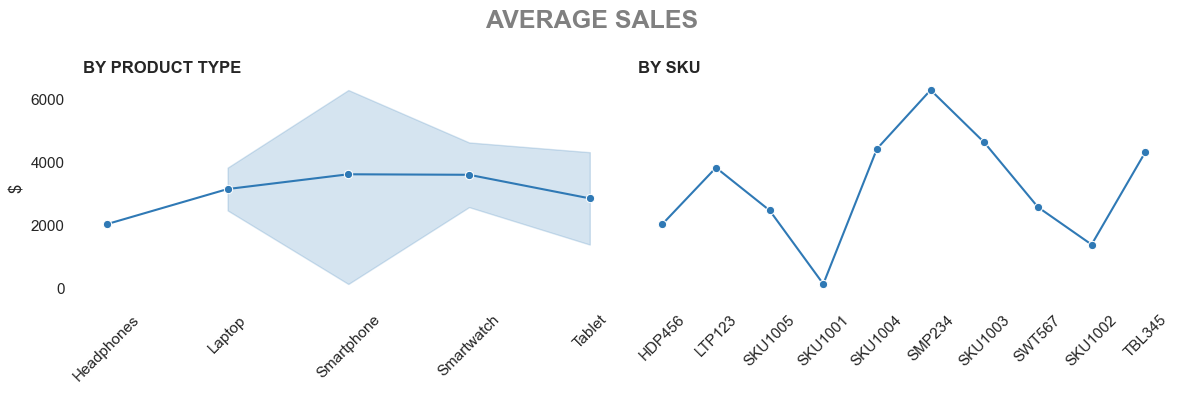

In [1609]:
# Group the DataFrame by product type, SKU, and order status, then aggregate the total price using sum and mean
total_price_by_sku = df_cleaned.groupby(['product_type','sku','order_status'])['total_price'].agg(['mean','sum']).reset_index()

# Filter the DataFrame to only include completed orders
total_price_by_sku = total_price_by_sku[(total_price_by_sku['order_status'] == 'Completed')]

# Create a figure with 1 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4),sharey=True)  # 2x2 grid

# Suptitle and common formatting
plt.suptitle('AVERAGE SALES', fontsize=18, fontweight='bold', color='grey')

# Plot 1 & 2 (mean)
metrics = ['product_type','sku']
titles = ['BY PRODUCT TYPE','BY SKU']
for ax, metric, title in zip(axes, metrics, titles):
    sns.lineplot(ax=ax, x=metric, y='mean', data=total_price_by_sku, marker='o',)
    ax.set_title(title,loc='left',fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('$')
    ax.grid()
    sns.despine(left=True, bottom=True) # Remove borders 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Hide x-axis labels for top row

# Adjust spacing and show plot
plt.tight_layout() 
plt.show()

### Observations

`Product Type`:  Smartwatches outperforms smartphones in terms of average sales. However, there is more variability in smartphone sales, as indicated by the wider confidence band. This suggests that smartphone sales are subject to greater fluctuations or uncertainty.

`sku`: SMP234 and SKU1003 are the top-selling SKUs based on average sales. SKU1001, which is a smartphone, exhibits the lowest average sales among the analyzed SKUs.



## 4.3 Behavioral Features

Behavioral features are characteristics derived from a customer's interactions with the business. They provide valuable insights into customer behavior, preferences, and loyalty. 

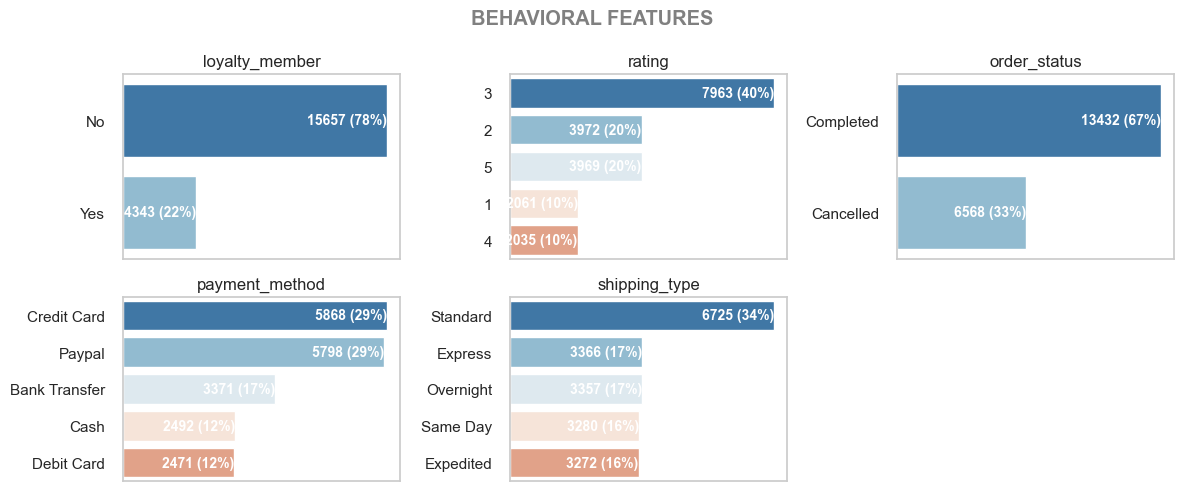

In [1610]:
# Define columns and number of columns per row
columns =  ['loyalty_member', 'rating', 'order_status', 
            'payment_method', 'shipping_type']

columns_per_row = 3

# Calculate number of rows for subplots
num_rows = (len(columns) // columns_per_row) + (len(columns) % columns_per_row > 0)

# Create figure and subplots with suptitle
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(12, 5))
plt.suptitle('BEHAVIORAL FEATURES', fontweight='bold', color='grey')

# Loop through columns and create countplots
for i, col in enumerate(columns):
    row = i // columns_per_row
    col_index = i % columns_per_row
    ax = axes[row, col_index]

    # Countplot with percentages and labels
    sns.countplot(y=df_cleaned[col], ax=ax, palette=palette_r,
                 order=df_cleaned[col].value_counts(ascending=False).index)

    # Get the counts 
    counts = df_cleaned[col].value_counts(ascending=False).values
    total = df_cleaned.shape[0]

    # Calculate percentages
    percentages = ((counts / total) * 100).round(2)

    # Create labels with percentages
    labels = [f"{value} ({percentage:.0f}%)" for value, percentage in zip(counts, percentages)]

    # Label bars with percentages (adjust vertical offset as needed)
    for j, (patch, label) in enumerate(zip(ax.patches, labels)):
        ax.text(patch.get_width() + 0.2, patch.get_y() + patch.get_height() / 2,
                label, ha='right', va='center', fontweight='bold', fontsize=10, color='white')

    #format axis
    ax.set_title(col)
    ax.grid(False)
    ax.set_xlabel('')
    ax.set_ylabel('')  
    ax.set_xticklabels([])
    axes.flatten()[-1].axis('off')
    
# Adjust layout and show plot
plt.tight_layout()
plt.show()

# 5. Feature Engineering


## 5.1 Repurchases

Check if there has been repurchases from same customer

In [1611]:
repurchases = df_cleaned['customer_id'].value_counts()[df_cleaned['customer_id'].value_counts() > 1]

print('No. of customers with multiple purchases:',repurchases.shape[0])
print(repurchases.head(5))

No. of customers with multiple purchases: 5499
customer_id
18304    8
16357    7
12276    6
14497    6
7070     6
Name: count, dtype: int64


## 5.2 RFM (Recency, Frequency, Monetary)

RFM is a basic customer segmentation algorithm based on their purchasing behavior. The behavior is identified by using only three customer data points:

This analysis is a customer segmentation technique used in marketing to identify and categorize customers based on their recent activity, frequency of purchases, and monetary value spent. 

In our case these have been defined with existing features.

- Recency (how recently a customer has made a purchase.) = most_recent_date - purchase_date
- Frequency (how often a customer has made purchases.) = `quantity`
- Monetary (total amount of money a customer has spent) = `total_price` 

Since our approach is behaviroal segmentation based on rfm features. we can create a new dataframe with just the relevant features.


### 5.2.1 Recency

First I will obtain the latest date from the dataframe and subtract the purchase date from the latest date to obtain the number of days since the customer last made a purchase (or recency). Then save this in a new dataframe

In [1612]:
# copy cleaned dataframe and save as new dataframe
df_new = df_cleaned.copy()

# Find the most recent date in the entire dataset
latest_date = df_new['purchase_date'].max()

# Calculate the number of days since the last purchase for each customer
df_new['recency'] = (latest_date - df['purchase_date']).dt.days

# Find the most recent purchase date for each customer
df_new = df_new.groupby('customer_id')['recency'].max().reset_index()
print(df_new.shape)
df_new.head()

(12136, 2)


customer_id  recency
0         1000      187
1         1002      342
2         1003      125
3         1004      120
4         1005      237

Grouping the data by customer ID resulted in a smaller dataset with 12,017 rows.

### 5.2.2 Frequency

Create two new features:

`total_orders`: Calculate the total number of times a customer has made purchases. This shows how often a customer engages with the business.

`total_qty`: Determine the total number of products a customer has bought across all orders. This reveals the customer's buying volume.

These features help segment customers by how often they buy, which is important for targeted marketing and personalized recommendations.

In [1613]:
# Calculate the total number of orders made by each customer
total_orders = df_cleaned['customer_id'].value_counts().reset_index()
total_orders.rename(columns={'count': 'total_orders'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_qty = df_cleaned.groupby('customer_id')['quantity'].sum().reset_index()
total_qty.rename(columns={'quantity': 'total_qty'}, inplace=True)

# Merge the new features into the customer_data dataframe
df_new = pd.merge(df_new, total_orders, on='customer_id')
df_new = pd.merge(df_new, total_qty, on='customer_id')

# Display the first few rows of the customer_data dataframe
df_new.head()

customer_id  recency  total_orders  total_qty
0         1000      187             2         10
1         1002      342             2          8
2         1003      125             1          2
3         1004      120             1          4
4         1005      237             2         18

### 5.2.3 Monetary

Create two financial features:

`total_spend`: Calculate the total amount spent by each customer by adding the `total_price` for all transactions made by a customer. This shows how much revenue each customer generates.

`avg_spend`: Divide a customer's `total spend` by their `total orders`. This indicates the average value of each transaction, helping to understand spending habits and tailor marketing strategies.


In [1614]:
# Calculate the total spend by each customer
total_spend = df_cleaned.groupby('customer_id')['total_price'].sum().reset_index()
total_spend.rename(columns={'total_price': 'total_spend'}, inplace=True)

# Calculate the average transaction value for each customer
average_spend = total_spend.merge(total_orders, on='customer_id')
average_spend['avg_spend'] = average_spend['total_spend'] / average_spend['total_orders']

# Merge the new features into the customer_data dataframe
df_new = pd.merge(df_new, total_spend, on='customer_id')
df_new = pd.merge(df_new, average_spend[['customer_id', 'avg_spend']], on='customer_id')

# Display the first few rows of the customer_data dataframe
df_new.head()

customer_id  recency  total_orders  total_qty  total_spend  avg_spend
0         1000      187             2         10      6279.42   3139.710
1         1002      342             2          8      5020.60   2510.300
2         1003      125             1          2        41.50     41.500
3         1004      120             1          4        83.00     83.000
4         1005      237             2         18     11779.11   5889.555

## 5.3 Behavioural Features

**Create new features**

- `avg_rating`: This is the average product rating by each customer. This helps gain insights into the overall customer satisfaction levels.

- `unique_sku`: This feature tracks the variety of products a customer buys. A higher value means the customer has a wide range of interests, while a lower value suggests a specific focus. Understanding this diversity can help us group customers by their buying habits and offer personalized product suggestions


**Fix and append existing features**

- `loyalty_member`: : Some customers' loyalty status is inconsistent. We'll correct this and include it in our updated dataset.




### 5.3.1 Average Product Rating

In [1615]:
# Calculate the total spend by each customer
average_rating = round(df_cleaned.groupby('customer_id')['rating'].mean().reset_index(),1)
average_rating.rename(columns={'rating': 'avg_rating'}, inplace=True)
average_rating

# Merge the data into the customer_data dataframe
df_new = pd.merge(df_new, average_rating[['customer_id','avg_rating']], on='customer_id')
df_new.head()

customer_id  recency  total_orders  total_qty  total_spend  avg_spend  \
0         1000      187             2         10      6279.42   3139.710   
1         1002      342             2          8      5020.60   2510.300   
2         1003      125             1          2        41.50     41.500   
3         1004      120             1          4        83.00     83.000   
4         1005      237             2         18     11779.11   5889.555   

   avg_rating  
0         2.5  
1         2.5  
2         5.0  
3         5.0  
4         3.0

### 5.3.2 Product Variety

In [1616]:
# Calculate the number of unique products purchased by each customer
sku_variety = df_cleaned.groupby('customer_id')[['sku']].nunique().reset_index()
sku_variety.rename(columns={'sku': 'sku_variety'}, inplace=True)
sku_variety

# Merge the new feature into the customer_data dataframe
df_new = pd.merge(df_new, sku_variety, on='customer_id')

# Display the first few rows of the customer_data dataframe
df_new.head(6) 

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  sku_variety  
0         2.5            2  
1         2.5            2  
2         5.0            1  
3         5.0            1  
4         3.0            2  
5         2.7            3

### 5.3.3 Loyalty Member

Previously, we confirmed has been repurchases from same customers.

In [1617]:
repurchases.head()

customer_id
18304    8
16357    7
12276    6
14497    6
7070     6
Name: count, dtype: int64

Let's check the `loyalty_member` of these customers to see if they are consistent

In [1618]:
# Filter the DataFrame by customer ID
filtered_df = df[(df['customer_id'] == 18304) | (df['customer_id'] == 12276)]
filtered_df[['customer_id','age','gender','loyalty_member','purchase_date']]

customer_id  age  gender loyalty_member purchase_date
11515        12276   52    Male            Yes    2024-03-22
11516        12276   52    Male             No    2024-05-25
11517        12276   52    Male            Yes    2024-07-16
11518        12276   52    Male             No    2024-08-11
11519        12276   52    Male             No    2024-08-15
11520        12276   52    Male            Yes    2024-08-16
18096        18304   33  Female            Yes    2024-01-18
18097        18304   33  Female             No    2024-03-08
18098        18304   33  Female             No    2024-04-04
18099        18304   33  Female             No    2024-05-13
18100        18304   33  Female             No    2024-05-26
18101        18304   33  Female             No    2024-07-29
18102        18304   33  Female            Yes    2024-08-10
18103        18304   33  Female             No    2024-09-16

Since the dataset is synthetic and the `gender` and `loyalty` has been adjusted for a more realistic distribution. There are inconsistencies in the loyalty during the adjustment. I'll reassign the loyalty member based on the first purchase's information. 

In [1619]:
# Sort the DataFrame by 'customer_id' and 'purchase_date'
df_cleaned.sort_values(['customer_id', 'purchase_date'], inplace=True)

# Group the DataFrame by 'customer_id' and take the first value of 'loyalty_member' for each group
df_cleaned['loyalty_member'] = df_cleaned.groupby('customer_id')['loyalty_member'].transform('first')

Validate the changes made to customer loyalty data by checking the status of customers who previously had inconsistent membership information

In [1620]:
# check changes for customer_id = 12276
df_cleaned[df_cleaned['customer_id']==12276]

customer_id  age gender loyalty_member product_type     sku  rating  \
11515        12276   52   Male            Yes   Smartwatch  SWT567       3   
11516        12276   52   Male            Yes   Smartphone  SMP234       5   
11517        12276   52   Male            Yes       Tablet  TBL345       4   
11518        12276   52   Male            Yes   Headphones  HDP456       2   
11519        12276   52   Male            Yes   Headphones  HDP456       3   
11520        12276   52   Male            Yes   Smartphone  SMP234       5   

      order_status payment_method  total_price  unit_price  quantity  \
11515    Cancelled  Bank Transfer      1378.50      459.50         3   
11516    Cancelled  Bank Transfer      9117.44     1139.68         8   
11517    Completed    Credit Card      6291.28      786.41         8   
11518    Completed    Credit Card      1805.90      361.18         5   
11519    Completed  Bank Transfer      3250.62      361.18         9   
11520    Completed         Paypal      9117.44     1139.68         8   

      purchase_date shipping_type  
11515    2024-03-22      Same Day  
11516    2024-05-25      Same Day  
11517    2024-07-16      Same Day  
11518    2024-08-11     Expedited  
11519    2024-08-15     Expedited  
11520    2024-08-16      Standard

 Changes look correct as the membership of this customer is now consistent.
 
 Let's encode loyalty_member and add it to the new dataset

In [1621]:
# Create a new dataset
loyalty = df_cleaned[['customer_id','loyalty_member']]

# One-hot encode the 'category' column
loyalty['loyalty_member'] = pd.Categorical(loyalty['loyalty_member']).codes
loyalty = loyalty.groupby('customer_id')['loyalty_member'].mean().astype(int).reset_index()

# Merge the data into the customer_data dataframe
df_new = pd.merge(df_new, loyalty, on='customer_id')
df_new.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  sku_variety  loyalty_member  
0         2.5            2               0  
1         2.5            2               0  
2         5.0            1               1  
3         5.0            1               0  
4         3.0            2               0  
5         2.7            3               0

### Customer Spending Index

A Customer Spending Index (CSI) is a metric used to assess the overall spending behavior of a customer or group of customers over a specific period. It provides insights into spending patterns, preferences, and loyalty.

**Higher CSI**: Indicates a customer who spends more, purchases frequently, buys a variety of products, and spends a higher average amount per transaction.

**Lower CSI**: Suggests a customer who spends less, purchases infrequently, buys a limited range of products, or spends a lower average amount per transaction.

CSI = (Total Spending * Purchase Frequency * Purchase Variety) / Average Order Value

In [1622]:
df_new['csi'] = (df_new['total_spend'] + df_new['total_qty'] + df_new['sku_variety']) / df_new['avg_spend']

### 5.3.4 Seasonal Trends

In [1623]:
# Extract month and year from InvoiceDate
df_cleaned['year'] = df_cleaned['purchase_date'].dt.year
df_cleaned['month'] = df_cleaned['purchase_date'].dt.month


# Calculate monthly spending for each customer
monthly_spending = df_cleaned.groupby(['customer_id', 'year', 'month'])['total_price'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('customer_id')['total_price'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'monthly_spending_mean', 'std': 'monthly_spending_std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['monthly_spending_std'].fillna(0, inplace=True)


# Merge the new features into the customer_data dataframe
df_new = pd.merge(df_new, seasonal_buying_patterns, on='customer_id')
# df_new = pd.merge(df_new, spending_trends, on='customer_id')

# Display the first few rows of the customer_data dataframe
df_new.head()

customer_id  recency  total_orders  total_qty  total_spend  avg_spend  \
0         1000      187             2         10      6279.42   3139.710   
1         1002      342             2          8      5020.60   2510.300   
2         1003      125             1          2        41.50     41.500   
3         1004      120             1          4        83.00     83.000   
4         1005      237             2         18     11779.11   5889.555   

   avg_rating  sku_variety  loyalty_member       csi  monthly_spending_mean  \
0         2.5            2               0  2.003822               3139.710   
1         2.5            2               0  2.003984               2510.300   
2         5.0            1               1  1.072289                 41.500   
3         5.0            1               0  1.060241                 83.000   
4         3.0            2               0  2.003396               5889.555   

   monthly_spending_std  
0           3392.160935  
1            925.546208  
2              0.000000  
3              0.000000  
4           2423.841838

## 5.4 Demographic Features

**Create new features**
- `Age Group`: Group `age` into 6 different categories because age is a fundamental demographic variable that can provide insights into consumer behavior, preferences, and spending patterns. By grouping age into categories, we can analyze how different age groups interact with the product.

**Affix existing features**
- `gender`: add this existing feature to the new dataframe



### 5.4.1 Age Group

Below are the common age categories for customer segmentation which will adapt to form the new `age_group` feature

Age Range |	Label | Group
---- | --- | --- |
18–24 | Young Adult | 0
25–34 | Young Professional | 1  
35–54 | Established Professional |2
55–64 | Pre-Retirement | 3
65+	| Retired | 4

In [1624]:
# create  age dataframe
age = df_cleaned.groupby('customer_id')['age'].mean().reset_index()

# Define the age bins and labels
age_bins = [17, 24, 34, 54, 64, 84]
age_label = ['Young Adult', 'Young Professional', 'Established Professional', 'Pre-Retirement', 'Retired']
age_group = ['0','1','2','3','4']

# Create a new 'age_group' column using pd.cut
age['age_label'] = pd.cut(age['age'], bins=age_bins, labels=age_label)
age['age_group'] = pd.cut(age['age'], bins=age_bins, labels=age_group).astype(int)

# merge the age_group to new dataset
df_new = pd.merge(df_new, age[['customer_id', 'age_group']], on='customer_id')
df_new.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  sku_variety  loyalty_member       csi  monthly_spending_mean  \
0         2.5            2               0  2.003822            3139.710000   
1         2.5            2               0  2.003984            2510.300000   
2         5.0            1               1  1.072289              41.500000   
3         5.0            1               0  1.060241              83.000000   
4         3.0            2               0  2.003396            5889.555000   
5         2.7            3               0  3.007140            4061.423333   

   monthly_spending_std  age_group  
0           3392.160935          2  
1            925.546208          2  
2              0.000000          4  
3              0.000000          2  
4           2423.841838          1  
5           1537.200737          0

### 5.4.2 Gender

In [1625]:
# Filter the DataFrame by customer ID
gender = df_cleaned[['customer_id','gender']]

# One-hot encode the 'category' column
gender['gender_code'] = pd.Categorical(gender['gender']).codes
gender = gender.groupby('customer_id')['gender_code'].mean().astype(int).reset_index()

# merge the age_group to customer dataset
df_new = pd.merge(df_new, gender, on='customer_id')
df_new.head(6)

customer_id  recency  total_orders  total_qty  total_spend    avg_spend  \
0         1000      187             2         10      6279.42  3139.710000   
1         1002      342             2          8      5020.60  2510.300000   
2         1003      125             1          2        41.50    41.500000   
3         1004      120             1          4        83.00    83.000000   
4         1005      237             2         18     11779.11  5889.555000   
5         1006      356             3         26     12184.27  4061.423333   

   avg_rating  sku_variety  loyalty_member       csi  monthly_spending_mean  \
0         2.5            2               0  2.003822            3139.710000   
1         2.5            2               0  2.003984            2510.300000   
2         5.0            1               1  1.072289              41.500000   
3         5.0            1               0  1.060241              83.000000   
4         3.0            2               0  2.003396            5889.555000   
5         2.7            3               0  3.007140            4061.423333   

   monthly_spending_std  age_group  gender_code  
0           3392.160935          2            1  
1            925.546208          2            1  
2              0.000000          4            1  
3              0.000000          2            0  
4           2423.841838          1            0  
5           1537.200737          0            1

## 5.5 Cancellations

Now, we'll explore the customers cancellation pattersn. 

 I'll add two features: 
 - `Cancellation Frequency`: how often they cancel
 - `Cancellation Rate`: how many orders they cancel compared to total orders 
 
 This will help us identify customers who are likely to cancel and improve their experience.





In [1626]:
# Calculate the total number of transactions made by each customer
total_orders = df_cleaned['customer_id'].value_counts().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df_cleaned[df_cleaned['order_status'] == 'Cancelled']
cancel_frequency = round((cancelled_transactions['customer_id'].value_counts().reset_index()),2)
cancel_frequency.rename(columns={'count': 'cancel_freq'}, inplace=True)


# Merge the Cancellation Frequency data into the customer_data dataframe
df_new = pd.merge(df_new, cancel_frequency, on='customer_id', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
df_new['cancel_freq'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
df_new['cancel_rate'] = df_new['cancel_freq'] / df_new['total_orders']

# Display the first few rows of the customer_data dataframe
df_new.head()

customer_id  recency  total_orders  total_qty  total_spend  avg_spend  \
0         1000      187             2         10      6279.42   3139.710   
1         1002      342             2          8      5020.60   2510.300   
2         1003      125             1          2        41.50     41.500   
3         1004      120             1          4        83.00     83.000   
4         1005      237             2         18     11779.11   5889.555   

   avg_rating  sku_variety  loyalty_member       csi  monthly_spending_mean  \
0         2.5            2               0  2.003822               3139.710   
1         2.5            2               0  2.003984               2510.300   
2         5.0            1               1  1.072289                 41.500   
3         5.0            1               0  1.060241                 83.000   
4         3.0            2               0  2.003396               5889.555   

   monthly_spending_std  age_group  gender_code  cancel_freq  cancel_rate  
0           3392.160935          2            1          1.0          0.5  
1            925.546208          2            1          0.0          0.0  
2              0.000000          4            1          0.0          0.0  
3              0.000000          2            0          0.0          0.0  
4           2423.841838          1            0          0.0          0.0

### 5.5.1 Plot Cancellations

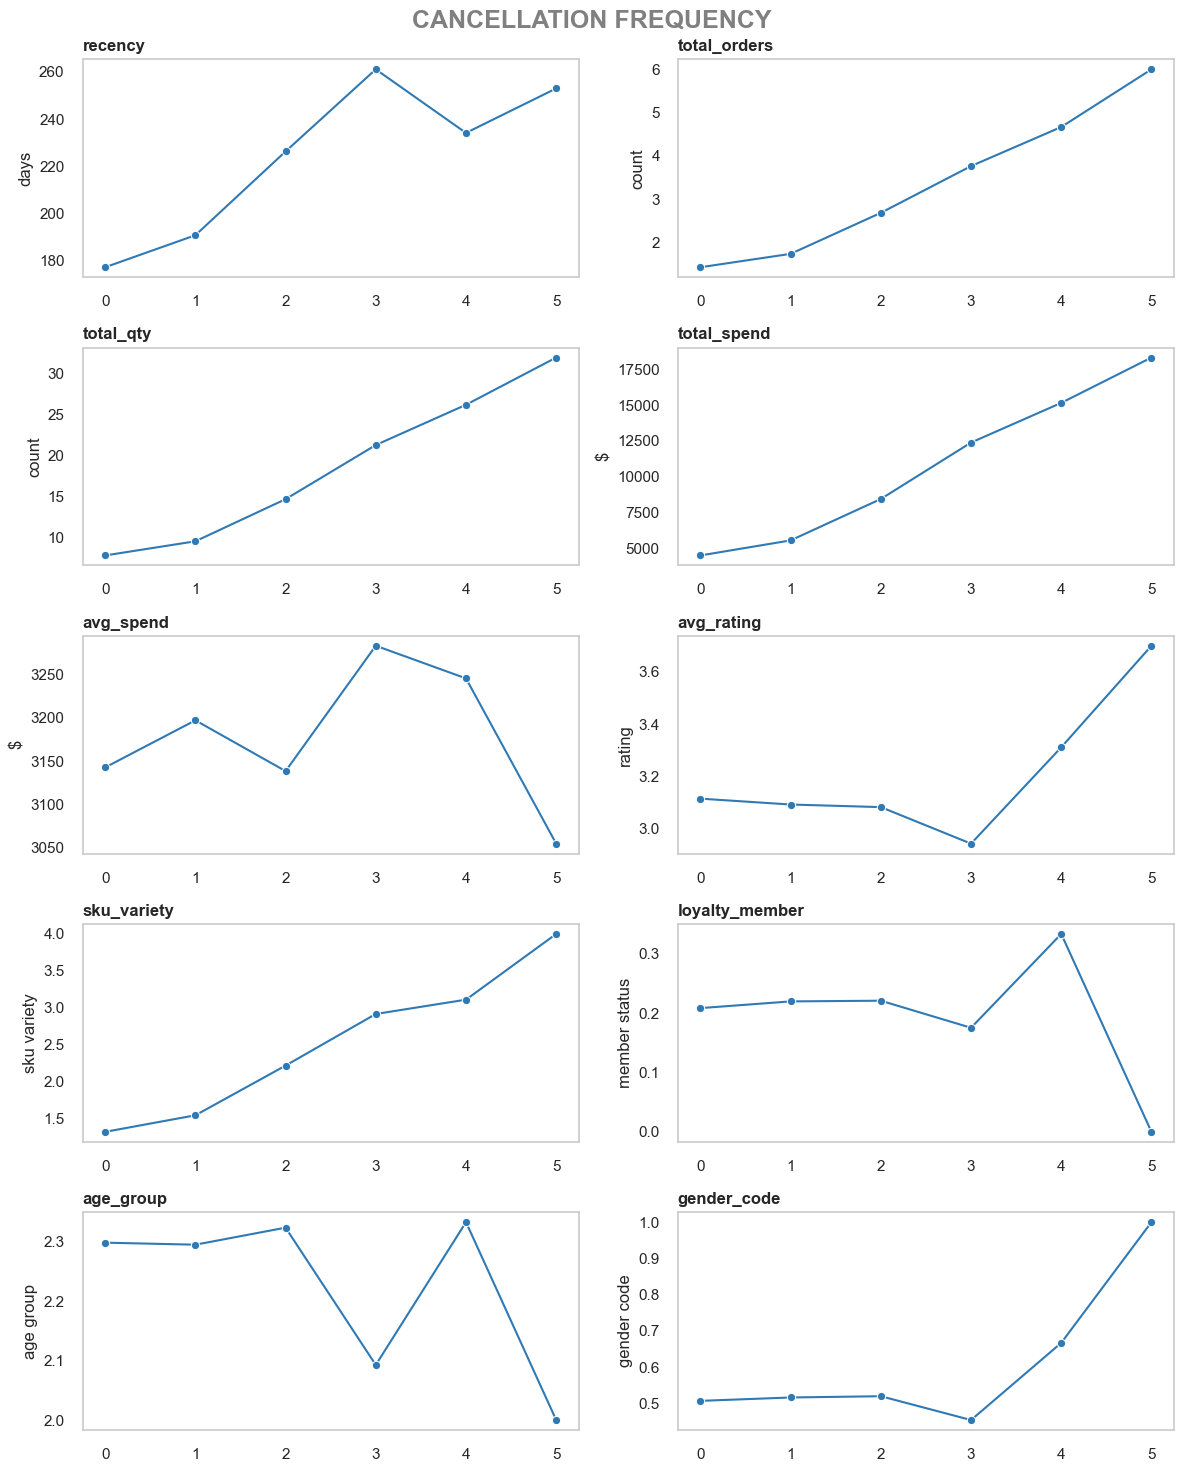

In [1629]:
# Define the columns to be plotted
columns = ['recency', 'total_orders', 
           'total_qty', 'total_spend', 
           'avg_spend', 'avg_rating',
           'sku_variety',
           'loyalty_member',
           'age_group', 
           'gender_code'
           ]


# Create labels dictionary for customization
ylabel_dict = {
    'recency': 'days',
    'total_orders': 'count',
    'total_qty': 'count',
    'total_spend': '$',
    'avg_spend': '$',
    'avg_rating': 'rating',
    'sku_variety': 'sku variety',
    'loyalty_member': 'member status',
    'age_group': 'age group',
    'gender_code': 'gender code'
}


# Create a figure with 2 rows and 2 columns (adjust based on your needs)
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  # 2x2 grid

# Suptitle and common formatting
plt.suptitle('CANCELLATION FREQUENCY', fontsize=18, fontweight='bold', color='grey')

# Loop through the desired columns and create plots
for i, metric in enumerate(columns):
    # Access the current row and column index
    row, col = divmod(i, 2)  # Efficient way to get row and col based on index

    sns.lineplot(ax=axes[row, col], y=metric, x='cancel_freq', data=df_new, marker='o',err_style=None)
    axes[row, col].set_title(metric, loc='left', fontweight='bold')

    # Set x-axis label only for the bottom row
    axes[row, col].set_xlabel('')

    # Set custom y-label using the dictionary
    axes[row, col].set_ylabel(ylabel_dict[metric])

    # remove gridlines
    axes[row, col].grid()

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

In [ ]:
latest_date - pd.to_timedelta(180, unit='D')

In [ ]:
latest_date

### Observations

`recency`: Customers often cancel 3 orders at a time. Many of these cancellations happen around 260 days from the dataset's most recent date (2024-09-23), which was around the beginning of January 2024. Most cancellations (up to 5 orders) occur in the middle of January. Since, there haven't been any cancellations since March, this implies that there are fewer cancellations with newer purchases.

`total_orders`: Customers who order more frequently are also more likely to cancel their orders.

`total_qty`: Customers who order more quantities are also more likely to cancel their orders.

`total_spend`: Customers who spend more are also more likely to cancel their orders.

`avg_spend`: cancellations fluctuates with average spends 

`avg_rating`: Interestly, cancellations increases as average product rating increases. 



## 5.6 Outlier Treatment

In this phase, I'll pinpoint and address outliers within our dataset. Outliers are data points that deviate substantially from the typical data points. These outliers can potentially distort the outcomes of our analysis, particularly in k-means clustering, where they can significantly influence the placement of cluster centers. Consequently, it's imperative to identify and handle these outliers effectively to attain more precise and meaningful clustering results.

Considering the multi-dimensional nature of our data, it's advisable to employ algorithms capable of detecting outliers in multi-dimensional spaces. For this purpose, I'll utilize the **Isolation Forest** algorithm. This algorithm is well-suited for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly choosing a split value between the feature's maximum and minimum values. When investigating outliers in the Data Cleaning section previously, the percentage of outliers detected were 1.91%, therefore, we'll use 2% or **0.02** as the contamination amount for the data set.


### Actions
1. Apply Isolation Forest algorithm to detect outliers with contamination amount of 0.02
2. Remove outliers from the main dataset to prevent their interference with the clustering process.

In [1630]:
print("Original DataFrame shape:", df_new.shape)

# Initialize Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)

# Fit the model to the data,exclude first column with customer_id
model.fit(df_new.iloc[:, 1:])

# Predict outlier scores and store in a new column 'outliers'
df_new['outliers'] = model.predict(df_new.iloc[:, 1:])

# Create a new DataFrame without outliers
df_new = df_new[df_new['outliers'] == 1]

# Drop the outlier column
df_new = df_new.drop(columns=['outliers'])

# Reset the index of the cleaned data
df_new.reset_index(drop=True, inplace=True)

print("DataFrame without outliers shape:", df_new.shape)


Original DataFrame shape: (12136, 16)
DataFrame without outliers shape: (11893, 16)


# 6. Feature Scaling


To ensure that all features contribute equally to the model and to uncover the true patterns in the data, I'll standardize our data. This means transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features need scaling. Here are the exceptions and why they're excluded:


In [1632]:
# Initialize the Scaler
scaler = StandardScaler()

# Create a copy of the original DataFrame 
df_scaled = df_new.copy()

# Specify the columns that need to be scaled
columns = ['age_group','recency','total_orders','avg_spend','total_qty','total_spend','sku_variety','cancel_freq','cancel_rate','avg_rating','monthly_spending_std','monthly_spending_mean',
          'csi',           
          # 'spending_trend'
          ]

# Applying the scaler to the necessary columns in the dataset
df_scaled[columns] = scaler.fit_transform(df_scaled[columns])

# Display the first few rows of the scaled data
df_scaled.set_index('customer_id', inplace=True)
df_scaled.head()

recency  total_orders  total_qty  total_spend  avg_spend  \
customer_id                                                              
1000         0.021255      0.521860   0.237559     0.314998  -0.001832   
1002         1.657274      0.521860  -0.126854     0.002143  -0.286747   
1003        -0.633153     -0.771426  -1.220093    -1.235316  -1.404299   
1004        -0.685928     -0.771426  -0.855680    -1.225002  -1.385513   
1005         0.549003      0.521860   1.695211     1.681839   1.242941   

             avg_rating  sku_variety  loyalty_member       csi  \
customer_id                                                      
1000          -0.570893     0.868685               0  0.516156   
1002          -0.570893     0.868685               0  0.516365   
1003           1.794798    -0.709813               1 -0.688481   
1004           1.794798    -0.709813               0 -0.704061   
1005          -0.097755     0.868685               0  0.515605   

             monthly_spending_mean  monthly_spending_std  age_group  \
customer_id                                                           
1000                     -0.066373              1.811626  -0.233387   
1002                     -0.331889              0.061235  -0.233387   
1003                     -1.373353             -0.595563   1.313379   
1004                     -1.355846             -0.595563  -0.233387   
1005                      1.093649              1.124475  -1.006770   

             gender_code  cancel_freq  cancel_rate  
customer_id                                         
1000                   1     0.765303     0.420658  
1002                   1    -0.820091    -0.802771  
1003                   1    -0.820091    -0.802771  
1004                   0    -0.820091    -0.802771  
1005                   0    -0.820091    -0.802771

# 7. Correlation Analysis

Correlation analysis is a valuable preprocessing step before applying K-means clustering to ensure the effectiveness and accuracy of the clustering results. Here's why:

1. Improve data quality: by removing **redundant** features and addressing **multicollinearity**.
2. Enhance model performance: by **reducing dimensionality** and improving interpretability.
3. Ensure accurate clustering results: by ensuring that features are **scaled** appropriately and that the model is not **overfitting**.

- correlation coefficient method
    - pearson :  assesses **linear** relationships
    - kendall :  assesses the **ordinal** relationships  
    - spearman : assesses monotonic relationships (whether **linear or not**), appropriate for both **continuous** and **discrete ordinal** variables

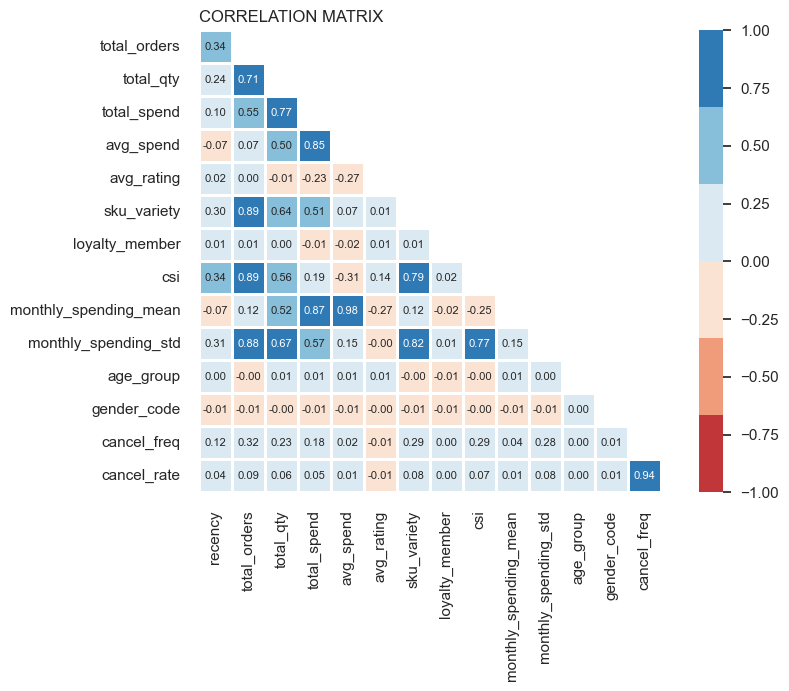

In [1633]:
# Create a figure for the heatmap with desired size (10 inches wide, 6 inches high)
plt.figure(figsize=(10, 6))

# Calculate the Spearman correlation coefficients for the scaled data
df_corr = df_scaled.corr(method='spearman')

# Create a mask to hide the upper triangle of the heatmap (redundant information)
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# Adjust the mask and correlation matrix to exclude the upper triangle and diagonal
mask = mask[1:, :-1]  # Remove the first row and last column from the mask
corr = df_corr.iloc[1:, :-1].copy()  # Copy the lower triangle of the correlation matrix


# Create the heatmap with customizations
sns.heatmap(corr,
            square=True,  
            fmt=".2f", 
            annot=True,  
            annot_kws={'size': 8},  
            vmin=-1, vmax=1,  
            cmap=palette,  
            mask=mask,  
            linewidths=1)  

# Remove grid lines from the heatmap
plt.grid(False)

# Set a title for the heatmap
plt.title('CORRELATION MATRIX', loc='left', fontsize=12) 

# Display the heatmap
plt.show()

## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with each other. This can make it difficult to accurately estimate the individual effects of these variables.

Multicollineartiy is present the dataset from the heatmap.



# 8. PCA Dimensionality Reduction

Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset while preserving the most important information. It transforms a large number of correlated variables into a smaller number of uncorrelated variables called principal components. These components capture the maximum variance in the data

PCA is primarily used to:
- **Reduce dimensionality**: Simplify complex datasets with numerous correlated variables.
- **Improve model performance**: PCA can help prevent overfitting by reducing the number of features.
- **Visualize data:** PCA can help visualize high-dimensional data in a lower-dimensional space.

Disadvantages:
- Loss of interpretability: The new principal components are linear combinations of the original features, making them harder to interpret.
- Assumption of linearity: PCA assumes that the data is linearly related, which might not always be the case.
- Sensitivity to scaling: PCA is sensitive to the scaling of the original features. Scaling the data before applying PCA is essential.
- Potential for information loss: While PCA can reduce dimensionality effectively, it might also lead to some loss of information.

In [1634]:
n_components_range = [2,3, 4,5, 6, 7]  # List of numbers of components for PCA
n_clusters_range = [2, 3, 4, 5,6,7,8,9]    # List of numbers of clusters for KMeans

# Create an empty list to store results from each combination of components and clusters
results = []

for n_components in n_components_range:
    for n_clusters in n_clusters_range:
        # Perform PCA
        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(df_scaled)
        pca_components = pca.components_

        # Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
        pca_result = pd.DataFrame(pca_result, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

        # Apply KMeans clustering
        kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100, random_state=0)
        kmeans_pca.fit(pca_result)
        labels = kmeans_pca.labels_

        # Get the frequency of each cluster
        cluster_frequencies = Counter(labels)

        # Create a mapping from old labels to new labels based on frequency
        label_mapping = {label: new_label for new_label, (label, _) in 
                        enumerate(cluster_frequencies.most_common())}


        # Apply the mapping to get the new labels
        new_labels = np.array([label_mapping[label] for label in labels])

        # Append the new cluster labels to the PCA version of the dataset
        pca_result['cluster'] = new_labels


        # Separate the features and the cluster labels
        X = pca_result.drop('cluster', axis=1)
        clusters = pca_result['cluster']

        # Compute metrics
        num_observations = len(pca_result)
        sil_score = silhouette_score(X, clusters)
        calinski_score = calinski_harabasz_score(X, clusters)
        davies_score = davies_bouldin_score(X, clusters)

        # Create a dictionary to store results for this combination
        result_dict = {
            "PCA components": n_components,
            "K clusters": n_clusters,
            "Number of Observations": num_observations,
            "Silhouette Score": sil_score,
            "Calinski Harabasz Score": calinski_score,
            "Davies Bouldin Score": davies_score
        }

        # Append the dictionary to the results list
        results.append(result_dict)

# Create a DataFrame from the list of results
df_results = pd.DataFrame(results)
df_results.sort_values(by='Silhouette Score', ascending=False)

PCA components  K clusters  Number of Observations  Silhouette Score  \
0                2           2                   11893          0.465582   
3                2           5                   11893          0.457585   
2                2           4                   11893          0.449900   
1                2           3                   11893          0.434622   
5                2           7                   11893          0.434230   
4                2           6                   11893          0.430285   
6                2           8                   11893          0.428433   
14               3           8                   11893          0.424060   
13               3           7                   11893          0.410391   
15               3           9                   11893          0.408695   
7                2           9                   11893          0.398219   
12               3           6                   11893          0.389395   
11               3           5                   11893          0.382154   
8                3           2                   11893          0.379708   
10               3           4                   11893          0.370607   
16               4           2                   11893          0.336991   
9                3           3                   11893          0.328763   
22               4           8                   11893          0.315257   
21               4           7                   11893          0.313534   
24               5           2                   11893          0.305679   
20               4           6                   11893          0.302182   
19               4           5                   11893          0.300581   
18               4           4                   11893          0.300274   
23               4           9                   11893          0.286570   
32               6           2                   11893          0.283081   
17               4           3                   11893          0.278471   
40               7           2                   11893          0.276956   
26               5           4                   11893          0.258434   
29               5           7                   11893          0.258363   
27               5           5                   11893          0.253440   
28               5           6                   11893          0.252526   
25               5           3                   11893          0.248325   
31               5           9                   11893          0.246068   
30               5           8                   11893          0.239934   
34               6           4                   11893          0.231983   
33               6           3                   11893          0.228193   
37               6           7                   11893          0.224949   
35               6           5                   11893          0.223745   
36               6           6                   11893          0.222073   
42               7           4                   11893          0.220455   
41               7           3                   11893          0.217443   
45               7           7                   11893          0.216946   
44               7           6                   11893          0.216748   
43               7           5                   11893          0.213637   
39               6           9                   11893          0.208322   
38               6           8                   11893          0.204099   
47               7           9                   11893          0.197937   
46               7           8                   11893          0.183129   

    Calinski Harabasz Score  Davies Bouldin Score  
0              11493.130165              0.872912  
3              12947.423654              0.782066  
2              12630.586638              0.812154  
1              11646.082325              0.745303  
5              1360

## 8.1 Determining the Right Number of Components

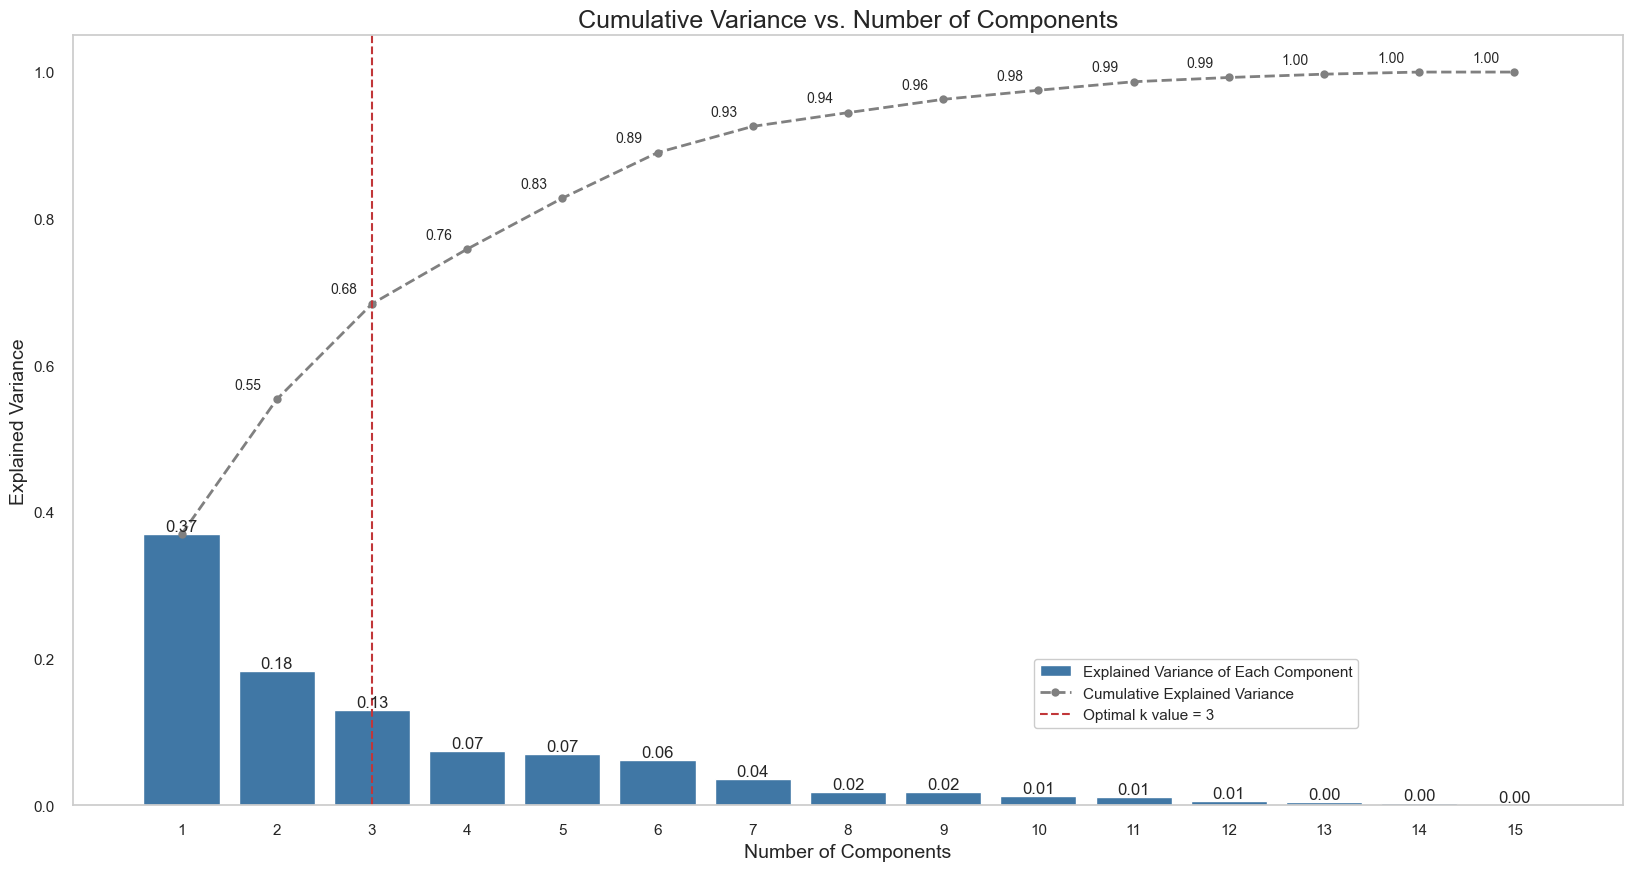

In [1635]:
# Fit PCA on scaled data
pca = PCA().fit(df_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# set threshold where minimual numner of components capture 70 of total variance
threshold = 0.75
# Get the first index exceeding the threshold
optimal_k = np.where(cumulative_explained_variance > threshold)[0][0] 

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='grey', linewidth=2)

# Line plot for the optimal k
optimal_k_line = plt.axvline(optimal_k - 1, color='#c13639', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0)  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom")
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(False)   

plt.show()

## 8.2 Applying PCA — Transforming Your Data

In [1638]:
n_components=optimal_k

pca = PCA(n_components=n_components)

# Fitting and transforming the original data to the new PCA dataframe
pca_result = pca.fit_transform(df_scaled)
pca_components = pca.components_

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
pca_result = pd.DataFrame(pca_result, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

pca_result.head()

PC1       PC2       PC3
0  1.734496 -0.527418  0.488936
1  0.692918 -0.778665 -1.422921
2 -2.846717 -1.501851 -1.076192
3 -2.705458 -1.445246 -1.099324
4  2.760580  1.550121 -1.321490

In [1637]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #c13639 ' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pca_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=df_scaled.columns)

pca_df.style.apply(highlight_top3, axis=0)

**PC1: Purchasing Frequency/Monetary** 
- comprises of total_orders, total_qty, total_spend


**PC2: Product Interests**
- comprises of total_orders, avg_spend, unique_sku

**PC3: Purchasing Behavior**
- comprises of age_group,cancel_rate,avg_rating


# 9. Customer Segmentation with K-means Clustering

## 9.1 Determining Optimal Number of Clusters


To determine the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

* __Elbow Method__

* __Silhouette Method__
    
It's common to utilize both methods in practice to corroborate the results.

### 9.1.1 Elbow Method

The Elbow Method is used to determine the optimal number of clusters (K) in K-means clustering. It involves plotting the explained variance ratio or within-cluster sum of squares (WCSS) against the number of clusters.

- WCSS: This measures the sum of squared distances between each data point and its assigned cluster centroid.
- Explained variance ratio: This measures the proportion of variance explained by each principal component in PCA.

The "elbow" point in the plot typically indicates the optimal number of clusters. This is the point where the decrease in WCSS or increase in explained variance ratio starts to diminish significantly. Beyond this point, adding more clusters doesn't provide a significant reduction in WCSS or increase in explained variance ratio.

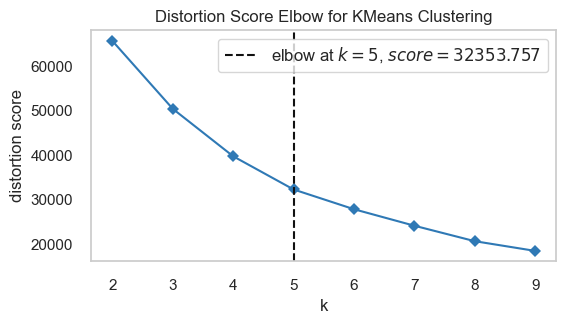

In [1639]:
# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(6, 3))
plt.grid(False)

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 10), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(pca_result)
# visualizer.fit(df_scaled)

# Finalize and render the figure
visualizer.show();

### 9.1.2 Silhouette Method

The __Silhouette Method__ is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the __silhouette coefficient for each data point__, which measures how similar a point is to its own cluster compared to other clusters.

       
What are the Advantages of Silhouette Method over the Elbow Method?
    
* The __Silhouette Method__ evaluates cluster quality by considering __both__ the __cohesion within clusters__ and their __separation__ from other clusters. This provides a more comprehensive measure of clustering performance compared to the __Elbow Method__, which only considers the __inertia__ (sum of squared distances within clusters).


* The __Silhouette Method__ produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of k. In contrast, the __Elbow Method__ relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbow.

    
* The __Silhouette Method__ generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the __Elbow Method__, which relies on visual inspection of the inertia plot.

Methodology
    
In the following analysis:

- I will initially choose a range of 4-7 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot __Silhouette scores__ for each k value to determine the one with the highest score.


- Subsequently, to fine-tune the selection of the most appropriate k, I will generate __Silhouette plots__ that visually display the __silhouette coefficients for each data point within various clusters__.


The __YellowBrick__ library will be utilized once again to create these plots and facilitate a comparative analysis.

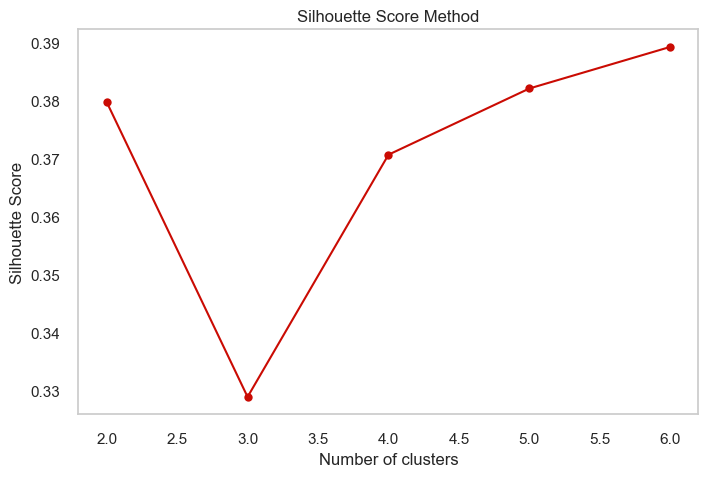

In [1640]:
data = pca_result.copy()

silhouette_scores = []  # To store the silhouette score for each number of clusters
k_values = range(2, 7)  # Test values for k (number of clusters)

# Apply KMeans for each number of clusters (from 2 to 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    
    # Append silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(False)
plt.show()

## 9.2 Clustering Model Iterations

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

#### 9.2.1 Evaluation Metrics


To further scrutinize the quality of our clustering, I will employ the following metrics:

- __Silhouette Score__: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
    
    
- __Calinski Harabasz Score__: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

    
- __Davies Bouldin Score__: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [1641]:
n_clusters_range = [2, 3, 4, 5, 6]    # List of numbers of clusters for KMeans
results = [] # Create an empty list to store results from each combination of components and clusters
new_df_names = []
for n_clusters in n_clusters_range:

    data = pca_result.copy()

    # Apply KMeans clustering
    kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100, random_state=0)
    kmeans_pca.fit(data)
    labels = kmeans_pca.labels_

    # Get the frequency of each cluster
    cluster_frequencies = Counter(labels)

    # Create a mapping from old labels to new labels based on frequency
    label_mapping = {label: new_label for new_label, (label, _) in 
                    enumerate(cluster_frequencies.most_common())}


    # Apply the mapping to get the new labels
    new_labels = np.array([label_mapping[label] for label in labels])

    # Append the new cluster labels to the PCA version of the dataset
    data['cluster'] = new_labels
 
    # Separate the features and the cluster labels
    X = data.drop('cluster', axis=1)
    clusters = data['cluster']

    # Compute metrics
    num_observations = len(data)
    sil_score = silhouette_score(X, clusters)
    calinski_score = calinski_harabasz_score(X, clusters)
    davies_score = davies_bouldin_score(X, clusters)

    # Create a dictionary to store results for this combination
    result_dict = {
        "K clusters": n_clusters,
        # "Number of Observations": num_observations,
        "Silhouette Score": sil_score,
        "Calinski Harabasz Score": calinski_score,
        "Davies Bouldin Score": davies_score
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Create a DataFrame from the list of results
df_results = pd.DataFrame(results)
df_results


K clusters  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0           2          0.379708              7871.450624              1.113045
1           3          0.328763              6918.044666              1.095144
2           4          0.370607              6903.926428              0.952174
3           5          0.382154              7051.326660              1.010693
4           6          0.389395              6911.984211              1.049885

#### 9.2.2 Clustering Quality Inference
    
If cluster separation is the primary goal: A lower Davies-Bouldin Score suggests that 6 clusters might be the best choice.

If compactness and cohesion are important: A higher Silhouette Score might favor 2 clusters, although the difference is minimal.

If balancing separation and compactness is desired: A middle ground might be found with 3 or 4 clusters, as they have relatively good scores for both metrics.

In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.



### 9.2.3 3D Scatter Plot of Top Principal Components


In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [1642]:
import plotly.express as px

n_clusters_range = [2,3,4,5,6]    # List of numbers of clusters for KMeans

for n_clusters in n_clusters_range:

    data = pca_result.copy()

    # Apply KMeans clustering
    kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100, random_state=0)
    kmeans_pca.fit(data)
    labels = kmeans_pca.labels_

    # Get the frequency of each cluster
    cluster_frequencies = Counter(labels)

    # Create a mapping from old labels to new labels based on frequency
    label_mapping = {label: new_label for new_label, (label, _) in 
                    enumerate(cluster_frequencies.most_common())}


    # Apply the mapping to get the new labels
    new_labels = np.array([label_mapping[label] for label in labels])

    # Append the new cluster labels to the PCA version of the dataset
    data['cluster'] = new_labels

    cluster_df = pd.DataFrame(data, columns=['PC1', 'PC2', 'PC3']).reset_index()

    # Turn the labels from integers to strings, 
    # such that it can be treated as discrete numbers in the plot.
    cluster_df['label'] = kmeans_pca.labels_
    cluster_df['label'] = cluster_df['label'].astype(str)

    fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', 
                        color='label',
                        opacity=1,
                        color_continuous_scale='icefire',
                        size_max=1,
                        title=f'{n_clusters} cluster plot',
                        width = 800, height = 500
                        # ).update_layout(margin=dict(
                        #     # l=0, 
                        #     # r=0, 
                        #     # b=0, 
                        #     # # t=0
                        #     )
                        ).update_traces(marker_size = 4)

    fig.show()




## 9.3 Final Cluster Selection k = 3

### 9.3.1 Modeling and Evaluation

In [1643]:
n_clusters = 5

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(pca_result)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
pca_result['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
df_new['cluster'] = new_labels
df_scaled['cluster'] = new_labels

# Separate the features and the cluster labels
X = pca_result.drop('cluster', axis=1)
clusters = pca_result['cluster']

# Compute metrics
num_observations = len(pca_result)
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# 
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Create a DataFrame from the list of results
df_results = pd.DataFrame(table_data,columns=["Metric", "Value"])
df_results

Metric         Value
0   Number of Observations  11893.000000
1         Silhouette Score      0.382154
2  Calinski Harabasz Score   7051.326660
3     Davies Bouldin Score      1.010693

### 9.3.2 3D Scatter Plot

In [1644]:

cluster_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3']).reset_index()

# Turn the labels from integers to strings, 
# such that it can be treated as discrete numbers in the plot.
cluster_df['label'] = kmeans.labels_
cluster_df['label'] = cluster_df['label'].astype(str)

fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', 
                      color='label',
                      opacity=1,
                      color_continuous_scale='icefire',
                      size_max=1,
                      width = 800, height = 500
                    ).update_layout(margin=dict(l=0, r=0, b=0, t=0)
                    ).update_traces(marker_size = 4)


fig.show()

### Add Resalers group back to df and label as 4 cluster

### 9.3.3 Cluster Distribution Visualization


I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

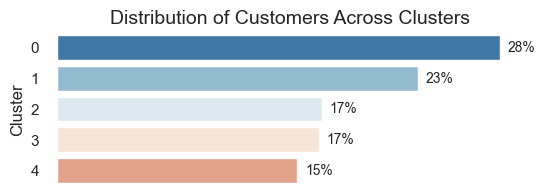

In [1645]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (pca_result['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(6, 2))
ax = sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h',palette=palette_r)
sns.despine(left=True, bottom=True) # Remove borders borders

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.0f}%',fontsize=10,va='center')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xlabel('Percentage (%)')
ax.set_xticklabels([])
ax.grid(False)
ax.set_xlabel('')

# Show the plot
plt.show()

Inference
    
The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 0 and 1 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers. 

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.


# 10. Cluster Analysis and Profiling

Now, let's analyze the individual characteristics of each customer segment to identify their unique behaviors and preferences. This will help me create a detailed profile for each cluster, outlining their key traits.

## 10.1 Radar Chart

Radar charts, also known as spider charts or polar charts, are a valuable tool for customer segmentation due to their ability to visually represent and compare multiple variables simultaneously

In [1490]:
#c13639 #f09c7b #fbe3d4 #dbeaf2 #87beda #2f79b5

In [ ]:
colors =['#c13639',
         '#f09c7b',
         '#2f79b5']

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_new.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_new.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_new['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_scaled.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])


# # Add a grid
# ax[0].grid(color='grey', linewidth=0.2)

# Display the plot
plt.tight_layout()
plt.show()

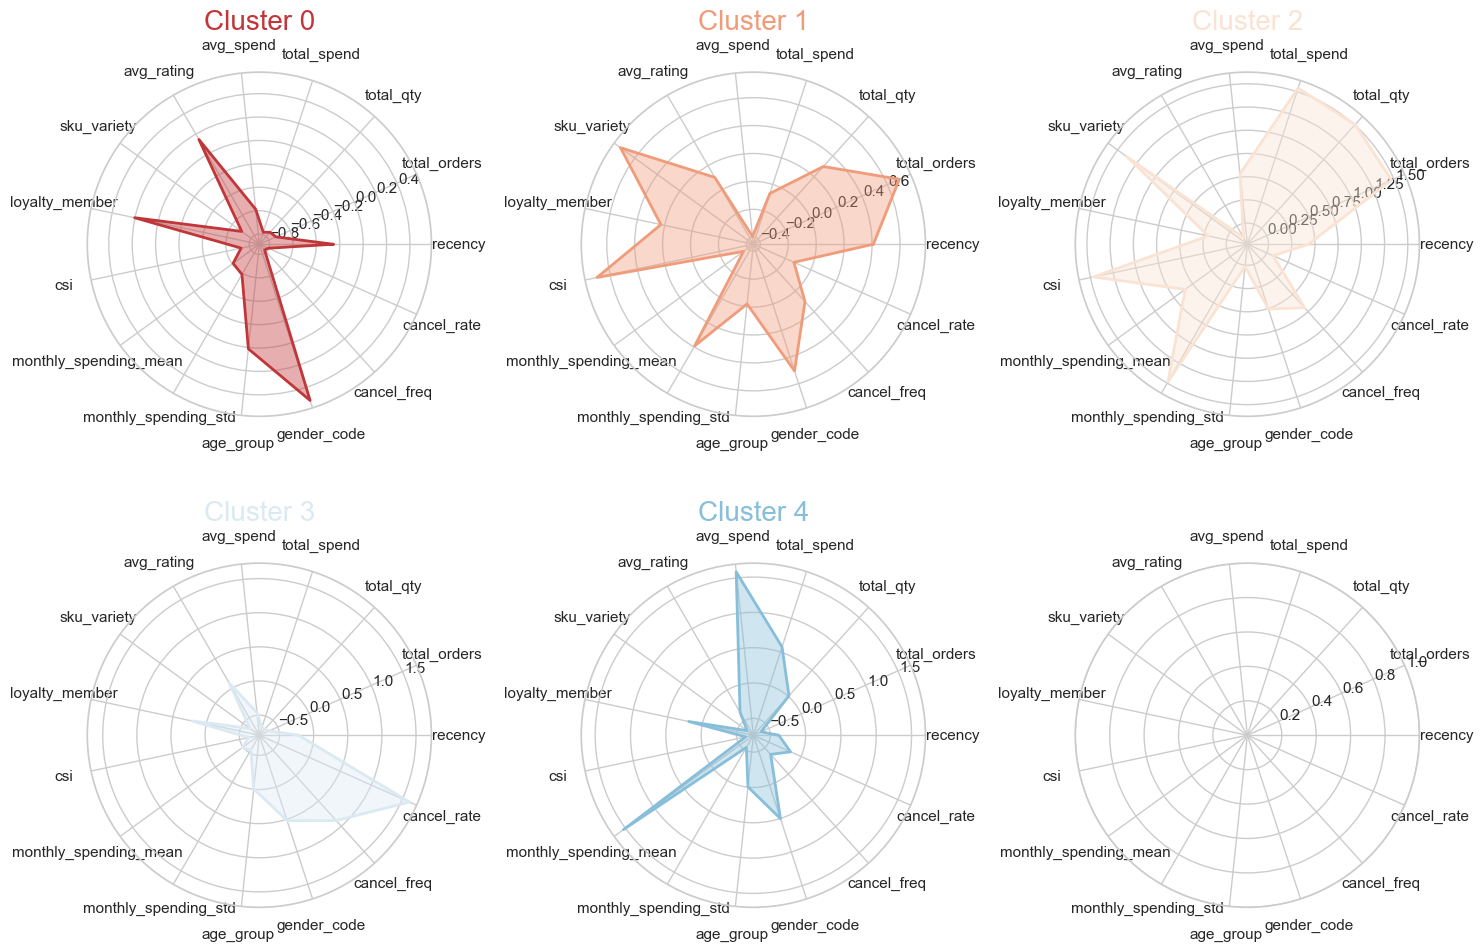

In [1646]:
colors =['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda','#2f79b5']

# Calculate the centroids of each cluster
cluster_centroids = df_scaled.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
 
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, axes = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True), nrows=2, ncols=3)

# Create radar chart for each cluster (flattened 2D array for indexing)
for i, cluster in enumerate(cluster_centroids.index):
    color = colors[i]  # Use cluster index for color selection
    data = cluster_centroids.loc[cluster].tolist()
    data += data[:1]  # Complete the loop
    row, col = divmod(i, 3)  # Calculate row and column for indexing
    create_radar_chart(axes[row, col], angles, data, color, cluster)

# Add input data labels (on the first row only)
axes[0, 0].set_xticks(angles[:-1])
axes[0, 0].set_xticklabels(labels[:-1])

axes[0, 1].set_xticks(angles[:-1])
axes[0, 1].set_xticklabels(labels[:-1])

axes[0, 2].set_xticks(angles[:-1])
axes[0, 2].set_xticklabels(labels[:-1])

axes[1, 0].set_xticks(angles[:-1])
axes[1, 0].set_xticklabels(labels[:-1])

axes[1, 1].set_xticks(angles[:-1])
axes[1, 1].set_xticklabels(labels[:-1])

axes[1, 2].set_xticks(angles[:-1])
axes[1, 2].set_xticklabels(labels[:-1])

# Adjust layout
plt.tight_layout()
plt.show()

In [1647]:
df_new.groupby('cluster').mean().iloc[:,1:]

recency  total_orders  total_qty   total_spend    avg_spend  \
cluster                                                                   
0        160.800835      1.030113   4.583482   1876.828697  1847.566495   
1        223.815886      2.133236  10.338214   4740.128704  2273.410136   
2        225.790025      2.734663  16.963092  11214.525222  4322.873579   
3        164.101413      1.103431   4.959637   2292.298613  2126.451864   
4        149.062088      1.117582   8.772527   7326.425297  6647.810495   

         avg_rating  sku_variety  loyalty_member       csi  \
cluster                                                      
0          3.258497     1.005665        0.203041  1.041912   
1          3.212116     1.909956        0.227306  2.142209   
2          2.951920     2.318204        0.203990  2.739843   
3          3.194501     1.053481        0.212916  1.113623   
4          2.721429     1.051648        0.197253  1.119138   

         monthly_spending_mean  monthly_spending_std  age_group  gender_code  \
cluster                                                                        
0                  1851.605941              9.300754   2.317233     0.516995   
1                  2437.314542           1389.898896   2.276354     0.504392   
2                  4717.639439           2930.777746   2.319701     0.505237   
3                  2153.767891             68.811337   2.296670     0.520686   
4                  6931.386698             77.069441   2.297253     0.502747   

         cancel_freq  cancel_rate  
cluster                            
0           0.000000     0.000000  
1           0.581991     0.274219  
2           0.954613     0.359210  
3           1.077195     0.986882  
4           0.281868     0.261813

## 10.2 Boxplot

While radar charts offer a visual representation of multiple variables for a single data point, they may not fully capture the distribution or variability of those variables within a customer segment. Boxplots provide a valuable complement to radar charts by offering a more detailed view of the distribution of individual variables within customer segments. This can help identify outliers, compare segments, and gain a deeper understanding of customer profiles.

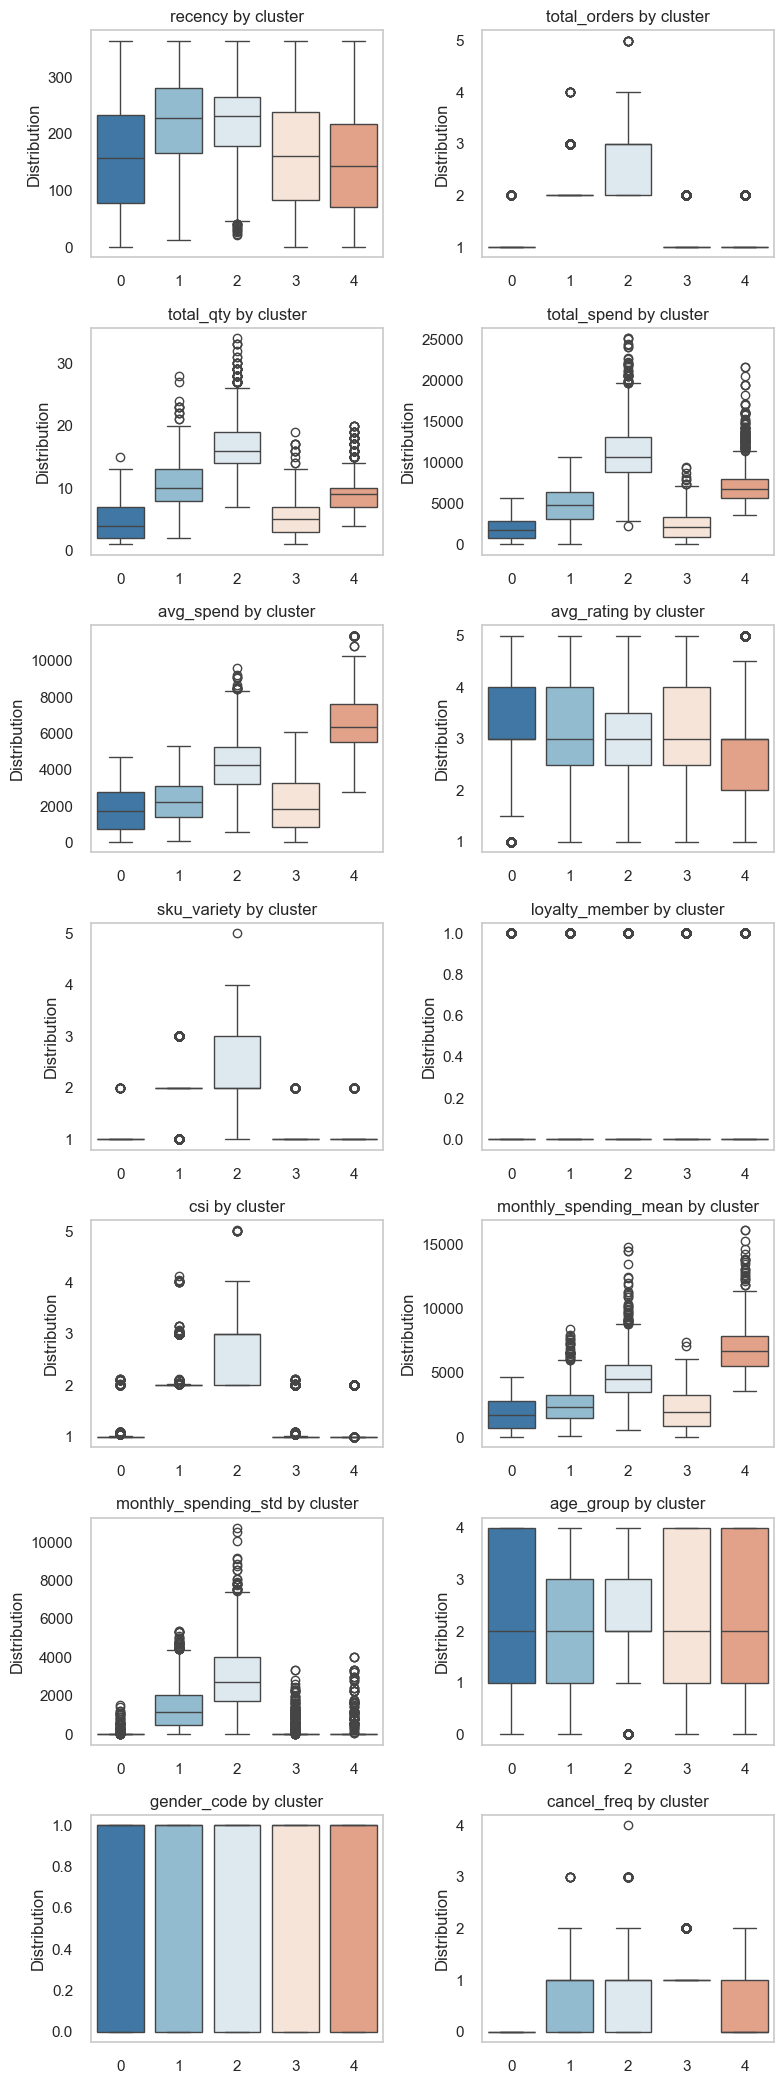

In [1648]:
# Select features but exclude 'customer_id' and 'cluster'
features = df_new.columns[1:-1]  

# Calculate the number of rows and columns for 3 columns per row
n_rows = len(features) // 2  # Integer division for full rows
n_cols = 2  # Target number of columns per row

# Create a figure and subplots with proper sizing
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 3 * n_rows))  # Adjust figsize as needed

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Loop through features and create stacked histograms
for i, feature in enumerate(features):
    if i >= len(axes):  # Break loop if all axes are used
        break

    all_data = df_new[feature]  # Get data for the entire feature
    cluster_data = {}  # Dictionary to store data for each cluster

    # Separate data by cluster
    for cluster in clusters:
        cluster_data[cluster] = df_new[df_new['cluster'] == cluster][feature]

    # Create a violin plot with more flexibility than boxplots
    sns.boxplot(
        data=cluster_data,
        palette=palette_r,
        ax=axes[i]
    )

    # Customize plot elements
    axes[i].set_title(f"{feature} by cluster", fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel("Distribution")  # Use "Distribution" for general violin plots
    axes[i].grid(axis='y')  # Optional gridlines for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

## 10.3 Customer Profiles

### Cluster 0: Minimalist Seniors
This label captures the cluster's focus on purchasing only essential items, likely due to their age and pre-retirement status.

- This segment represents 40% of our customer base.
- **Age Group**: These customers are generally older, in the 55-64 age range, and approaching retirement.
- **Purchase Behavior**: They have the lowest purchase frequency, quantity, and spending of all our customer groups. They seldom buy extra products. Nevertheless, their recent purchases surpass those of other segments.
- **Product Interests**:- Their product variety is the most limited among our customer clusters, which aligns with their age group. Older customers often prioritize purchasing only essential items.



### Cluster 1: Young Professional
This label accurately reflects the cluster's age group and their slightly higher engagement level compared to Cluster 0.

- This segment represents 32% of our customer base.
- **Age Group**: The key difference between this cluster and Cluster 0 is the age group. These customers are younger, typically in the 25-34 age range, and likely young professionals.
- **Purchase Behavior**: They have slightly higher purchase frequency and spending compared to Cluster 0, demonstrating a healthy level of engagement.
- **Product Interests**: Their product variety is slightly more diverse than that of Cluster 0, suggesting a more focused product selection.


### Cluster 2: Established Shoppers
This label highlights the cluster's high level of engagement, frequent purchases, and tendency to purchase add-on products, suggesting they are established customers who regularly shop with the company.

- **Age Group**: This segment comprises established professionals and mid-career individuals in the 35-54 age range.

- **Purchase Behavior**: They are our most engaged customers, exhibiting the highest purchase frequency, quantity, and spending. They often buy extra products.

- **Product Interests**: They have a more diverse product selection compared to other clusters, as demonstrated by their higher SKU count.



# 11. Personalized Product Recommendation System


In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. Earlier in the project, during the customer data preparation stage, I isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called `outliers_data`.

Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting __the top three products__ popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

### 11.1 Extract the customer_id of the outliers and remove their transactions from the main dataframe


In [ ]:
# outlier_customers = outliers_data['customer_id'].astype('int').unique()
df_filtered = df[~df['customer_id'].isin(outliers_data)]
df_filtered.head()

### 12.2 Merge the transaction data with the customer data to get the cluster information for each transaction


In [ ]:
merged_df = df_filtered.merge(df_customer[['customer_id', 'cluster']], on='customer_id', how='inner')
merged_df.head()

### 12.3 Identify the top 10 best-selling products in each cluster based on the total quantity sold


In [ ]:
best_selling_products = merged_df.groupby(['cluster', 'product_type', 'sku'])['quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)
top_products_per_cluster

## 12.4 Create a record of products purchased by each customer in each cluster


In [ ]:
customer_purchases = merged_df.groupby(['customer_id', 'cluster', 'sku'])['quantity'].sum().reset_index()
customer_purchases.head()


## 12.5 Generate recommendations for each customer in each cluster


In [71]:
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = df_customer[df_customer['cluster'] == cluster]['customer_id']

    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['customer_id'] == customer) & (customer_purchases['cluster'] == cluster)]['sku'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['sku'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['sku', 'product_type']].values.flatten().tolist())

## 12.6 Create a dataframe from the recommendations list and merge it with the original customer data


In [72]:
df_recommendation = pd.DataFrame(recommendations, 
                                 columns=['customer_id', 'cluster', 
                                          'sku_1', 'product_1', 
                                          'sku_2', 'product_2',
                                          'sku_3', 'product_3'
                                          ])

## 12.7 Display 10 random rows showing customer recommendations 


In [ ]:
df_recommendation.set_index('customer_id').iloc[:,:].sample(10)